In [1]:
#import stuff
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import matplotlib.cm as cm
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from astropy.table import QTable
from mpl_toolkits.mplot3d import Axes3D
from sympy import Ellipse, Point, Rational
from scipy import stats
from scipy.stats import multivariate_normal
import seaborn as sns
import random
import os
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

# Beehive

In [2]:
beehive_p = pd.read_csv('/home/and/Data_science/Tesis/CSVs/filtered/Beehive_filtered.csv')

In [3]:
beehive_p[beehive_p.columns[0:12]].head(30)

Unnamed: 0       pmra  pmra_error      pmdec  pmdec_error  parallax  \
0           29 -12.595913    0.048030  11.004673     0.032846  1.670137   
1           30 -18.631524    0.081604 -63.990011     0.075039  8.942348   
2           31 -11.061814    0.108043  -1.199507     0.086703  1.991362   
3           39   5.221027    0.151202  -5.933208     0.111038  1.094237   
4           44 -30.986906    0.224112 -20.120484     0.171096  2.961643   
5           45   5.519167    0.068507  -1.659040     0.060132  1.000873   
6           51   5.059564    0.060009  -5.556500     0.041114  1.194538   
7           61   8.430679    0.064905 -36.656685     0.047126  4.351992   
8           66  -6.518655    0.067965  -9.034182     0.053384  1.193808   
9           72   6.727062    0.060705  -6.312177     0.045509  1.732956   
10          73   2.190583    0.077575  -7.291192     0.053651  1.903619   
11          85  12.160913    0.143423 -28.949942     0.104557  3.747716   
12          94 -11.958364    0.078781  -5.421098     0.061122  1.153291   
13          95 -19.775384    0.185612  -7.219840     0.132163  2.329183   
14          99  -5.460638    0.069981  -1.629953     0.048296  0.504688   
15         103  -9.421628    0.068942 -10.858220     0.048764  0.598215   
16         109  -9.432352    0.061113   5.097571     0.042193  0.920714   
17         115  -4.039820    0.057281  -0.866337     0.044594  0.937628   
18         120 -17.647591    0.106507  -8.964012     0.078355  3.203151   
19         135  -9.304615    0.057858  -8.985281     0.040011  1.610670   
20         136 -57.993947    0.469034   8.457540     0.476878  3.202143   
21         137   9.046893    0.269800 -30.335105     0.282675  2.169924   
22         156  -3.379336    0.072211  -4.796840     0.049182  0.533285   
23         168  -2.593401    0.087985 -14.479242     0.061154  0.855662   
24         172  -1.278433    0.047441  -2.036125     0.038835  1.385984   
25         179  50.065027    0.170599 -38.768052     0.135542  8.922462   
26         182 -13.125569    0.086266  -6.910669     0.060353  2.337317   
27         184  29.976902    0.073724 -11.013203     0.056350  2.919878   
28         199  15.702307    0.118248 -22.014110     0.079103  2.225901   
29         201 -18.119460    0.052631 -11.877501     0.038360  3.269629   

    parallax_error          g     g_error         rp      rp_error         bp  
0         0.033116  13.204008   22.425176  12.755542     56.345131  13.491129  
1         0.049739  11.968179  137.732556  11.229263    352.291710  12.601629  
2         0.073800  15.808794    5.793469  14.968358     18.175075  16.567070  
3         0.093409  16.833057    2.499818  16.050049      9.040321  17.504316  
4         0.155428  17.190792    2.757079  16.109753     15.674235  18.374650  
5         0.044348  14.496509    8.734350  13.934058     34.525212  14.852909  
6         0.041450  14.413147    7.654919  13.888143     23.540972  14.782526  
7         0.036595  14.665828   10.031435  13.766253     43.721041  15.511284  
8         0.043093  14.544024    9.811245  13.994686     45.543738  14.938269  
9         0.034577  14.590692    9.010951  13.988434     22.847178  15.039479  
10        0.055611  15.159433    7.013585  14.452195     15.307620  15.738602  
11        0.106607  15.941505    5.218453  14.890583     17.591097  17.062916  
12        0.052240  14.852852    8.184793  14.329841     21.273519  15.215182  
13        0.139572  16.757345    3.487489  15.690307     13.327391  17.904980  
14        0.048940  14.872702    7.575898  14.355294     26.134593  15.233551  
15        0.040398  14.996461    7.044520  14.521220     21.507338  15.302244  
16        0.042262  14.522147    8.206198  13.989622     27.925417  14.901148  
17        0.037697  13.654169   16.603790  13.103722     58.241215  14.060012  
18        0.075401  12.585259   61.053382  12.062960    178.759588  12.950571  
19        0.040899  13.088995   41.560168  12.626396     74.924249  13.392221 

In [4]:
beehive_p[beehive_p.columns[12:19]].head(30)

bp_error     bp_rp  visibility_periods_used  astrometric_chi2_al  \
0      62.894045  0.735587                       10           187.295640   
1     309.214459  1.372366                        9           245.600720   
2      12.219543  1.598712                        9           157.815440   
3       7.005020  1.454267                       11           221.786290   
4      11.201413  2.264896                        9           152.126710   
5      23.663599  0.918851                       10           230.357010   
6      26.102704  0.894383                       10           148.325000   
7      31.393737  1.745030                       10           151.329450   
8      27.367341  0.943583                       10           119.076164   
9      49.313335  1.051045                       10           167.771820   
10     13.231981  1.286407                        9           123.962280   
11     11.814521  2.172333                        9           223.608950   
12     21.416336  0.885342                        9           108.119580   
13      8.267332  2.214673                        9           165.517800   
14     16.358608  0.878257                       10           160.872200   
15     20.819675  0.781024                       10           135.277530   
16     22.008810  0.911526                       10           136.558700   
17     71.251064  0.956290                        9           122.074220   
18    159.322496  0.887611                        9           310.289920   
19     64.302525  0.765825                        9           239.799160   
20      8.477991  2.747913                       10           209.264330   
21      5.876657  2.335339                       10           164.983340   
22     22.471148  0.934637                       10           174.765820   
23     26.679977  0.923425                        9           128.071440   
24     58.456289  0.767072                        9           133.508770   
25     12.411644  2.812763                        9           368.393600   
26     23.616503  1.746275                       10           201.517440   
27     20.448605  1.508859                        9           114.730300   
28  34503.354908  0.935111                        9           269.932280   
29     34.325681  1.427714                       10           143.739650   

    astrometric_n_good_obs_al  abs(pmra_error/pmra)  abs(pmdec_error/pmdec)  
0                         186              0.003813                0.002985  
1                         173              0.004380                0.001173  
2                         157              0.009767                0.072282  
3                         194              0.028960                0.018715  
4                         150              0.007232                0.008504  
5                         175              0.012413                0.036245  
6                         188              0.011861                0.007399  
7                         178              0.007699                0.001286  
8                         186              0.010426                0.005909  
9                         186              0.009024                0.007210  
10                        188              0.035413                0.007358  
11                        154              0.011794                0.003612  
12                        160              0.006588                0.011275  
13                        153              0.009386                0.018305  
14                        193              0.012815                0.029630  
15                        164              0.007317                0.004491  
16                        196              0.006479                0.008277  
17                        168              0.014179                0.051475  
18                        146              0.006035                0.008741  
19                        169              0.006218                0.004453  
20           

In [5]:
#to stack
columns = beehive_p.columns
print(columns)

Index(['Unnamed: 0', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error', 'parallax',
       'parallax_error', 'g', 'g_error', 'rp', 'rp_error', 'bp', 'bp_error',
       'bp_rp', 'visibility_periods_used', 'astrometric_chi2_al',
       'astrometric_n_good_obs_al', 'abs(pmra_error/pmra)',
       'abs(pmdec_error/pmdec)', 'abs(parallax_error/parallax)', 'UWE',
       'RUWE'],
      dtype='object')


In [6]:
beehive_p = beehive_p.dropna()
beehive_p = np.column_stack((beehive_p[columns[0]],
beehive_p[columns[1]],beehive_p[columns[2]],
                              beehive_p[columns[3]],
                              beehive_p[columns[4]],
                              beehive_p[columns[5]],
                              beehive_p[columns[6]],
                              beehive_p[columns[7]],
                              beehive_p[columns[8]],
                              beehive_p[columns[9]],
                              beehive_p[columns[10]],
                              beehive_p[columns[11]],
                              beehive_p[columns[12]],
                              beehive_p[columns[13]],
                              beehive_p[columns[14]],
                              beehive_p[columns[15]],
                              beehive_p[columns[16]],
                              beehive_p[columns[17]],
                              beehive_p[columns[18]],
                              beehive_p[columns[19]],
                              beehive_p[columns[20]]
                             ))

In [7]:
#beehive = pd.read_csv('/home/and/Data_science/Tesis/CSVs/filtered/Beehive_filtered.csv')
#beehive = np.column_stack((beehive[columns[1]],
#                            beehive[columns[3]]))

In [8]:
beehive = pd.read_csv('/home/and/Data_science/Tesis/CSVs/filtered/Beehive_filtered.csv')
beehive = np.column_stack((beehive[columns[1]],
                            beehive[columns[3]],
                          beehive[columns[5]]))

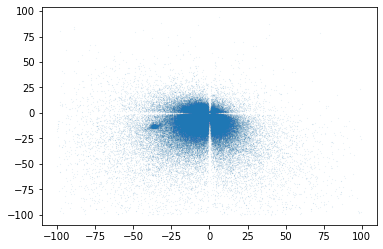

In [9]:
plt.scatter(beehive_p[:,1],beehive_p[:,3], s =0.001)

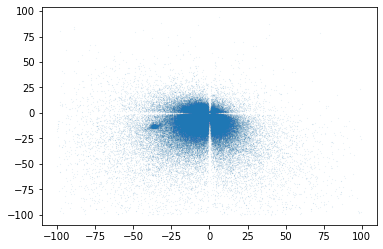

In [10]:
plt.scatter(beehive[:,0],beehive[:,1], s =0.001)

# Blanco1

In [11]:
blanco_p = pd.read_csv('/home/and/Data_science/Tesis/CSVs/filtered/Blanco1_filtered.csv')

In [12]:
#to stack
columns = blanco_p.columns
print(columns)

Index(['Unnamed: 0', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error', 'parallax',
       'parallax_error', 'g', 'g_error', 'rp', 'rp_error', 'bp', 'bp_error',
       'bp_rp', 'visibility_periods_used', 'astrometric_chi2_al',
       'astrometric_n_good_obs_al', 'abs(pmra_error/pmra)',
       'abs(pmdec_error/pmdec)', 'abs(parallax_error/parallax)', 'UWE',
       'RUWE'],
      dtype='object')


In [13]:
blanco_p = blanco_p.dropna()
blanco_p = np.column_stack((blanco_p[columns[0]],
blanco_p[columns[1]],blanco_p[columns[2]],
                              blanco_p[columns[3]],
                              blanco_p[columns[4]],
                              blanco_p[columns[5]],
                              blanco_p[columns[6]],
                              blanco_p[columns[7]],
                              blanco_p[columns[8]],
                              blanco_p[columns[9]],
                              blanco_p[columns[10]],
                              blanco_p[columns[11]],
                              blanco_p[columns[12]],
                              blanco_p[columns[13]],
                              blanco_p[columns[14]],
                              blanco_p[columns[15]],
                              blanco_p[columns[16]],
                              blanco_p[columns[17]],
                              blanco_p[columns[18]],
                              blanco_p[columns[19]],
                              blanco_p[columns[20]]
                             ))

In [14]:
#blanco = pd.read_csv('/home/and/Data_science/Tesis/CSVs/filtered/Blanco1_filtered.csv')
#blanco = np.column_stack((blanco[columns[1]],
                            #blanco[columns[3]]))

In [15]:
blanco = pd.read_csv('/home/and/Data_science/Tesis/CSVs/filtered/Blanco1_filtered.csv')
blanco = np.column_stack((blanco[columns[1]],
                            blanco[columns[3]],
                          blanco[columns[5]]))

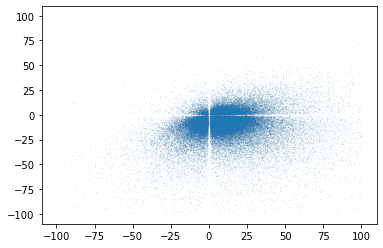

In [16]:
plt.scatter(blanco_p[:,1],blanco_p[:,3], s =0.001)

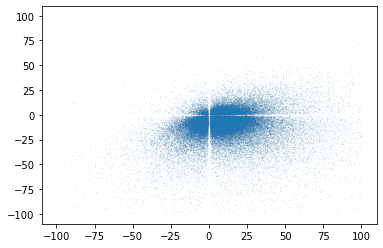

In [17]:
plt.scatter(blanco[:,0],blanco[:,1], s =0.001)

# Hyades

In [18]:
hyades_p = pd.read_csv('/home/and/Data_science/Tesis/CSVs/filtered/Hyades_filtered.csv')

In [19]:
#to stack
columns = hyades_p.columns
print(columns)

Index(['Unnamed: 0', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error', 'parallax',
       'parallax_error', 'g', 'g_error', 'rp', 'rp_error', 'bp', 'bp_error',
       'bp_rp', 'visibility_periods_used', 'astrometric_chi2_al',
       'astrometric_n_good_obs_al', 'abs(pmra_error/pmra)',
       'abs(pmdec_error/pmdec)', 'abs(parallax_error/parallax)', 'UWE',
       'RUWE'],
      dtype='object')


In [20]:
hyades_p = hyades_p.dropna()
hyades_p = np.column_stack((hyades_p[columns[0]],
hyades_p[columns[1]],hyades_p[columns[2]],
                              hyades_p[columns[3]],
                              hyades_p[columns[4]],
                              hyades_p[columns[5]],
                              hyades_p[columns[6]],
                              hyades_p[columns[7]],
                              hyades_p[columns[8]],
                              hyades_p[columns[9]],
                              hyades_p[columns[10]],
                              hyades_p[columns[11]],
                              hyades_p[columns[12]],
                              hyades_p[columns[13]],
                              hyades_p[columns[14]],
                              hyades_p[columns[15]],
                              hyades_p[columns[16]],
                              hyades_p[columns[17]],
                              hyades_p[columns[18]],
                              hyades_p[columns[19]],
                              hyades_p[columns[20]]
                             ))

In [21]:
#hyades = pd.read_csv('/home/and/Data_science/Tesis/CSVs/filtered/Hyades_filtered.csv')
#hyades = np.column_stack((hyades[columns[1]],
#                            hyades[columns[3]]))

In [22]:
hyades = pd.read_csv('/home/and/Data_science/Tesis/CSVs/filtered/Hyades_filtered.csv')
hyades = np.column_stack((hyades[columns[1]],
                          hyades[columns[3]],
                         hyades[columns[5]]))

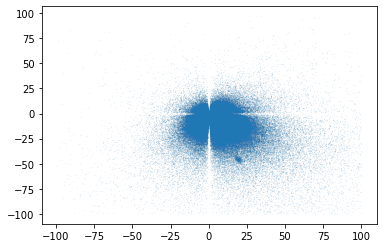

In [23]:
plt.scatter(hyades_p[:,1],hyades_p[:,3], s =0.001)

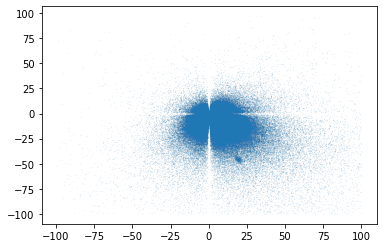

In [24]:
plt.scatter(hyades[:,0],hyades[:,1], s =0.001)

# NGC

In [25]:
ngc_p = pd.read_csv('/home/and/Data_science/Tesis/CSVs/filtered/NGC2451_filtered.csv')

In [26]:
#to stack
columns = ngc_p.columns
print(columns)

Index(['Unnamed: 0', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error', 'parallax',
       'parallax_error', 'g', 'g_error', 'rp', 'rp_error', 'bp', 'bp_error',
       'bp_rp', 'visibility_periods_used', 'astrometric_chi2_al',
       'astrometric_n_good_obs_al', 'abs(pmra_error/pmra)',
       'abs(pmdec_error/pmdec)', 'abs(parallax_error/parallax)', 'UWE',
       'RUWE'],
      dtype='object')


In [27]:
ngc_p = ngc_p.dropna()
ngc_p = np.column_stack((ngc_p[columns[0]],
ngc_p[columns[1]],ngc_p[columns[2]],
                              ngc_p[columns[3]],
                              ngc_p[columns[4]],
                              ngc_p[columns[5]],
                              ngc_p[columns[6]],
                              ngc_p[columns[7]],
                              ngc_p[columns[8]],
                              ngc_p[columns[9]],
                              ngc_p[columns[10]],
                              ngc_p[columns[11]],
                              ngc_p[columns[12]],
                              ngc_p[columns[13]],
                              ngc_p[columns[14]],
                              ngc_p[columns[15]],
                              ngc_p[columns[16]],
                              ngc_p[columns[17]],
                              ngc_p[columns[18]],
                              ngc_p[columns[19]],
                              ngc_p[columns[20]]
                             ))

In [28]:
#ngc = pd.read_csv('/home/and/Data_science/Tesis/CSVs/filtered/NGC2451_filtered.csv')
#ngc = np.column_stack((ngc[columns[1]],
                        #ngc[columns[3]]))

In [29]:
ngc = pd.read_csv('/home/and/Data_science/Tesis/CSVs/filtered/NGC2451_filtered.csv')
ngc = np.column_stack((ngc[columns[1]],
                        ngc[columns[3]],
                      ngc[columns[5]]))

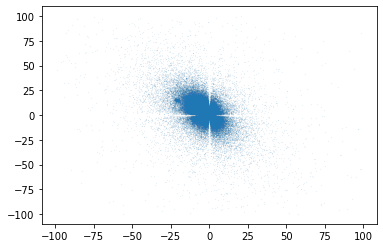

In [30]:
plt.scatter(ngc_p[:,1],ngc_p[:,3], s =0.001)

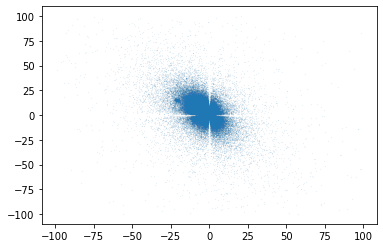

In [31]:
plt.scatter(ngc[:,0],ngc[:,1], s =0.001)

# Perseus

In [32]:
perseus_p = pd.read_csv('/home/and/Data_science/Tesis/CSVs/filtered/Perseus_filtered.csv')

In [33]:
#to stack
columns = perseus_p.columns
print(columns)

Index(['Unnamed: 0', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error', 'parallax',
       'parallax_error', 'g', 'g_error', 'rp', 'rp_error', 'bp', 'bp_error',
       'bp_rp', 'visibility_periods_used', 'astrometric_chi2_al',
       'astrometric_n_good_obs_al', 'abs(pmra_error/pmra)',
       'abs(pmdec_error/pmdec)', 'abs(parallax_error/parallax)', 'UWE',
       'RUWE'],
      dtype='object')


In [34]:
perseus_p = perseus_p.dropna()
perseus_p = np.column_stack((perseus_p[columns[0]],
perseus_p[columns[1]],perseus_p[columns[2]],
                              perseus_p[columns[3]],
                              perseus_p[columns[4]],
                              perseus_p[columns[5]],
                              perseus_p[columns[6]],
                              perseus_p[columns[7]],
                              perseus_p[columns[8]],
                              perseus_p[columns[9]],
                              perseus_p[columns[10]],
                              perseus_p[columns[11]],
                              perseus_p[columns[12]],
                              perseus_p[columns[13]],
                              perseus_p[columns[14]],
                              perseus_p[columns[15]],
                              perseus_p[columns[16]],
                              perseus_p[columns[17]],
                              perseus_p[columns[18]],
                              perseus_p[columns[19]],
                              perseus_p[columns[20]]
                             ))

In [35]:
#perseus = pd.read_csv('/home/and/Data_science/Tesis/CSVs/filtered/Perseus_filtered.csv')
#perseus = np.column_stack((perseus[columns[1]],
#                            perseus[columns[3]]))

In [36]:
perseus = pd.read_csv('/home/and/Data_science/Tesis/CSVs/filtered/Perseus_filtered.csv')
perseus = np.column_stack((perseus[columns[1]],
                            perseus[columns[3]],
                            perseus[columns[3]]))

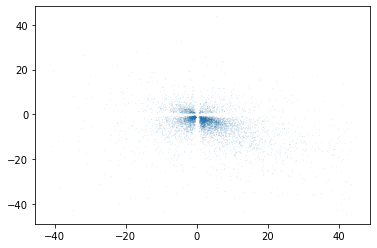

In [37]:
plt.scatter(perseus_p[:,1],perseus_p[:,3], s =0.001)

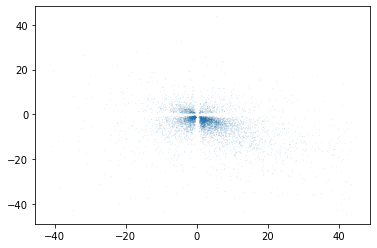

In [38]:
plt.scatter(perseus[:,0],perseus[:,1], s =0.001)

# Pleaides

In [39]:
pleiades_p = pd.read_csv('/home/and/Data_science/Tesis/CSVs/filtered/Pleiades_filtered.csv')

In [40]:
#to stack
columns = pleiades_p.columns
print(columns)
print(columns[5])

Index(['Unnamed: 0', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error', 'parallax',
       'parallax_error', 'g', 'g_error', 'rp', 'rp_error', 'bp', 'bp_error',
       'bp_rp', 'visibility_periods_used', 'astrometric_chi2_al',
       'astrometric_n_good_obs_al', 'abs(pmra_error/pmra)',
       'abs(pmdec_error/pmdec)', 'abs(parallax_error/parallax)', 'UWE',
       'RUWE'],
      dtype='object')
parallax


In [41]:
pleiades_p = pleiades_p.dropna()
pleiades_p = np.column_stack((pleiades_p[columns[0]],
pleiades_p[columns[1]],pleiades_p[columns[2]],
                              pleiades_p[columns[3]],
                              pleiades_p[columns[4]],
                              pleiades_p[columns[5]],
                              pleiades_p[columns[6]],
                              pleiades_p[columns[7]],
                              pleiades_p[columns[8]],
                              pleiades_p[columns[9]],
                              pleiades_p[columns[10]],
                              pleiades_p[columns[11]],
                              pleiades_p[columns[12]],
                              pleiades_p[columns[13]],
                              pleiades_p[columns[14]],
                              pleiades_p[columns[15]],
                              pleiades_p[columns[16]],
                              pleiades_p[columns[17]],
                              pleiades_p[columns[18]],
                              pleiades_p[columns[19]],
                              pleiades_p[columns[20]]
                             ))

In [42]:
#pleiades = pd.read_csv('/home/and/Data_science/Tesis/CSVs/filtered/Pleiades_filtered.csv')
#pleiades = np.column_stack((pleiades[columns[1]],
#                            pleiades[columns[3]]))

In [43]:
pleiades = pd.read_csv('/home/and/Data_science/Tesis/CSVs/filtered/Pleiades_filtered.csv')
pleiades = np.column_stack((pleiades[columns[1]],
                            pleiades[columns[3]],
                            pleiades[columns[5]]))

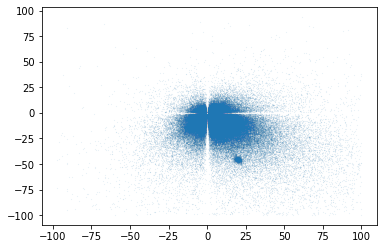

In [44]:
plt.scatter(pleiades_p[:,1],pleiades_p[:,3], s =0.001)

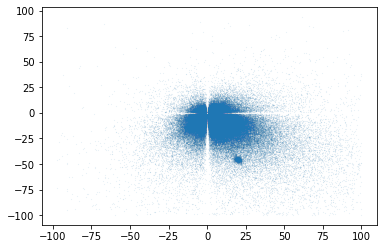

In [45]:
plt.scatter(pleiades[:,0],pleiades[:,1], s =0.001)

In [47]:
#random smaple and normalize data
def random_sample(name, percentage):
    total = []
    count =0
    for i in range(len(name)): 
        total.append(count)
        count += 1
       #random sample 
    rndm = random.sample(total, int(len(total)*percentage))
    return rndm

def organize(name, datalen_0, datalen_f):
    
    #df = pd.DataFrame(name, columns = ['pmra', 'pmdec'])#, 'parallax'])
    
    df = pd.DataFrame(name, columns = ['pmra', 'pmdec', 'parallax'])
    #normalizing
    min_max_scaler = MinMaxScaler() 
    df_normed = min_max_scaler.fit_transform(df)
    df_normed = pd.DataFrame(df_normed) 
    #df_normed = df_normed.rename(columns = {0: 'pmra', 1: 'pmdec'})#, 2: 'parallax'})
    df_normed = df_normed.rename(columns = {0: 'pmra', 1: 'pmdec', 2: 'parallax'})
    df_normed = df_normed[datalen_0:datalen_f]
    df = df[datalen_0:datalen_f]
    
    return df, df_normed

def DBSCAN(df_0, df_normed_1,  Eps, Msamples):  
    
    from sklearn.cluster import DBSCAN
    dbscan = DBSCAN(eps=Eps, min_samples =Msamples, metric = "euclidean").fit(df_normed_1)
    clusters = dbscan.fit_predict(df_normed_1)
    df_values = df_0.values 
    
    return clusters
    
def cluster_c(df, cluster):
    copy = pd.DataFrame()
    copy['pmra'] = df['pmra'].values
    copy['pmdec'] = df['pmdec'].values
    
    copy['parallax'] = df['parallax'].values
    
    copy['label'] = cluster
    quantity_cluster =  pd.DataFrame()
    quantity_cluster['cantidad'] = copy.groupby('label').size()
    
    return copy, quantity_cluster
    
def cluster_clean(copy, name):
    copy = copy.drop(copy[copy['label'] == -1].index)
    pmra = copy['pmra'].values
    pmdec = copy['pmdec'].values
   # parallax = copy['parallax'].values
    label = copy['label'].values
    
    if name == 'pleiades':
        plt.scatter(pmra, pmdec, s = 0.1)#, c=copy['label'], cmap="magma")#, c=copy['labels'], cmap="viridis")
        plt.xlabel("$\mu_x$")
        plt.ylabel("$\mu_y$")
        plt.title('$Pleiades$')
             
    elif name =='beehive':
        plt.scatter(pmra, pmdec, s = 0.1)#,c=copy['label'], cmap="cool")
        plt.xlabel("$\mu_x$")
        plt.ylabel("$\mu_y$")
        plt.title('$Beehive$')
        
              
    elif name =='perseus':
        plt.scatter(pmra, pmdec, s = 0.1)#,c=copy['label'], cmap="cool")
        plt.xlabel("$\mu_x$")
        plt.ylabel("$\mu_y$")
        plt.title('$Perseus$')
        
    elif name =='hyades':
        plt.scatter(pmra, pmdec, s = 0.1)#,c=copy['label'], cmap="cool")
        plt.xlabel("$\mu_x$")
        plt.ylabel("$\mu_y$")
        plt.title('$Hyades$')
        
    elif name =='ngc':
        plt.scatter(pmra, pmdec, s = 0.1)#,c=copy['label'], cmap="cool")
        plt.xlabel("$\mu_x$")
        plt.ylabel("$\mu_y$")
        plt.title('$NGC2451$')
        
              
    elif name =='blanco':
        plt.scatter(pmra, pmdec, s = 0.1)#,c=copy['label'], cmap="cool")
        plt.xlabel("$\mu_x$")
        plt.ylabel("$\mu_y$")
        plt.title('$Blanco 1$')
        
    plt.show()
    return copy

def zoom(s):
    if s == True:
        # unable zoom in plot
        %matplotlib inline
        import mpld3
        mpld3.enable_notebook()
    elif s == False :
        # disable zoom in plot
        %matplotlib auto
        
def all_together(open_cluster, open_cluster_r,  
sample_percenatge, split_set, Eps, Msamples):
    
    X_0, Y_0, dbscan, pd_0, pmd_0 = [],[],[],[],[]
    
    r = random_sample(open_cluster, sample_percenatge)
    
    df_split_set = np.array_split(open_cluster[r], split_set)
    
    open_cluster_rp_bp = pd.DataFrame()
    open_cluster_rp_bp[columns[0]] = open_cluster_r[r][:,0]
    open_cluster_rp_bp[columns[1]] = open_cluster_r[r][:,1]
    open_cluster_rp_bp[columns[2]] = open_cluster_r[r][:,2]
    open_cluster_rp_bp[columns[3]] = open_cluster_r[r][:,3]
    open_cluster_rp_bp[columns[4]] = open_cluster_r[r][:,4]
    open_cluster_rp_bp[columns[5]] = open_cluster_r[r][:,5]
    open_cluster_rp_bp[columns[6]] = open_cluster_r[r][:,6]
    open_cluster_rp_bp[columns[7]] = open_cluster_r[r][:,7]
    open_cluster_rp_bp[columns[8]] = open_cluster_r[r][:,8]
    open_cluster_rp_bp[columns[9]] = open_cluster_r[r][:,9]
    open_cluster_rp_bp[columns[10]] = open_cluster_r[r][:,10]
    open_cluster_rp_bp[columns[11]] = open_cluster_r[r][:,11]
    open_cluster_rp_bp[columns[12]] = open_cluster_r[r][:,12]
    open_cluster_rp_bp[columns[13]] = open_cluster_r[r][:,13]
    open_cluster_rp_bp[columns[14]] = open_cluster_r[r][:,14]
    open_cluster_rp_bp[columns[15]] = open_cluster_r[r][:,15]
    open_cluster_rp_bp[columns[16]] = open_cluster_r[r][:,16]
    open_cluster_rp_bp[columns[17]] = open_cluster_r[r][:,17]
    open_cluster_rp_bp[columns[18]] = open_cluster_r[r][:,18]
    open_cluster_rp_bp[columns[10]] = open_cluster_r[r][:,19]
    open_cluster_rp_bp[columns[20]] = open_cluster_r[r][:,20]
    
     
    for i in range(len(df_split_set)):
        xx = organize(df_split_set[i],0,len(df_split_set[i]))[0]
        yy = organize(df_split_set[i],0,len(df_split_set[i]))[1]
        X_0.append(xx)
        Y_0.append(yy)
    
    
    for i in range(len(df_split_set)):
        cluster = DBSCAN(X_0[i], Y_0[i], Eps, Msamples)
        dbscan.append(cluster)
    
   
    for i in range(len(dbscan)):
        pp = cluster_c(X_0[i],dbscan[i])[0]
        pmd = cluster_c(X_0[i],dbscan[i])[1]
        pd_0.append(pp)
        pmd_0.append(pmd)
    
    #tot_df = pd_0[0].append([pd_0[1],pd_0[2],pd_0[3],pd_0[4],pd_0[5],pd_0[6],pd_0[7],pd_0[8],pd_0[9],pd_0[10],pd_0[11],pd_0[12],pd_0[13],pd_0[14],pd_0[15],pd_0[16],pd_0[17]  ,pd_0[18],pd_0[19],pd_0[20],pd_0[21],pd_0[22],pd_0[23],    pd_0[24]])
    tot_df_0 = []
    for i in range(1,split_set):
        tot_df_0.append(pd_0[i])
        
    tot_df = pd_0[0].append(tot_df_0)

    
    #print(" is:  {0}".format(str(len(pleiades_p))))
    print("len(df_split_set):  {0}".format(str(len(df_split_set))))
    print("len(dbscan):  {0}".format(str(len(dbscan))))
    
    
    return tot_df , open_cluster_rp_bp
    
    

# Perseus DBSCAN

In [243]:
perseus_dbscan = all_together(perseus, perseus_p, 1,1, 0.001, 15 )    

len(df_split_set):  1
len(dbscan):  1


In [304]:
perseus_dbscan_label = np.array(perseus_dbscan[0]['label'])
perseus_dbscan[1]['label'] = perseus_dbscan_label

In [305]:
perseus_dbscan[1].groupby(['label']).count()

Unnamed: 0  pmra  pmra_error  pmdec  pmdec_error  parallax  \
label                                                               
-1           6009  6009        6009   6009         6009      6009   
 0           1038  1038        1038   1038         1038      1038   
 1             15    15          15     15           15        15   
 2              8     8           8      8            8         8   

       parallax_error     g  g_error    rp  rp_error    bp  bp_error  bp_rp  \
label                                                                         
-1               6009  6009     6009  6009      6009  6009      6009   6009   
 0               1038  1038     1038  1038      1038  1038      1038   1038   
 1                 15    15       15    15        15    15        15     15   
 2                  8     8        8     8         8     8         8      8   

       visibility_periods_used  astrometric_chi2_al  \
label                                                 
-1                        6009                 6009   
 0                        1038                 1038   
 1                          15                   15   
 2                           8                    8   

       astrometric_n_good_obs_al  abs(pmra_error/pmra)  \
label                                                    
-1                          6009                  6009   
 0                          1038                  1038   
 1                            15                    15   
 2                             8                     8   

       abs(pmdec_error/pmdec)   UWE  
label                                
-1                       6009  6009  
 0                       1038  1038  
 1                         15    15  
 2                          8     8

In [306]:
per = perseus_dbscan[1].copy()

In [307]:
#per.loc[ple['label']>= 0, "label"] = 0

In [308]:
per_0 =  per.loc[per['label'] >= 0]
per_1m=  per.loc[per['label'] == -1] 
#per_1 =  per.loc[per['label'] >= 1]

(-50.0, 50.0)

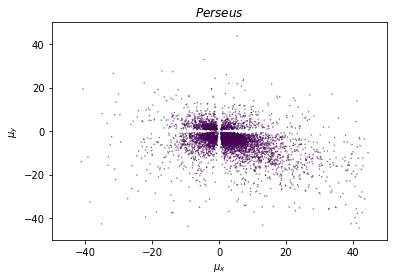

In [309]:
plt.scatter(per['pmra'], per['pmdec'], s =0.1,c =per['label'], cmap='viridis')
plt.title('$Perseus$')
plt.ylabel('$\mu_y$')
plt.xlabel('$\mu_x$')
plt.xlim(-50,50)
plt.ylim(-50,50)

(-25.0, 25.0)

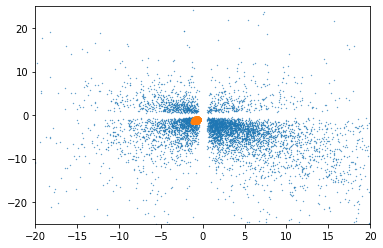

In [311]:
plt.scatter(per_1m['pmra'], per_1m['pmdec'], s =0.1)
plt.scatter(per_0['pmra'], per_0['pmdec'], s =10)
#plt.scatter(per_1['pmra'], per_1['pmdec'], s =10)
plt.xlim(-20,20)
plt.ylim(-25,25)

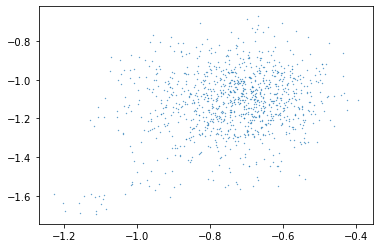

In [312]:
plt.scatter(per_0['pmra'], per_0['pmdec'], s =0.1)


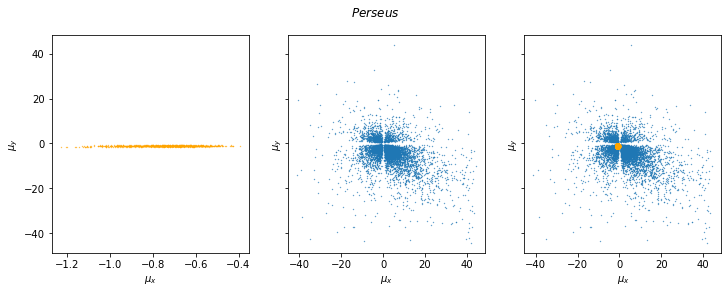

In [333]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharey=True,figsize=(12, 4))

ax0.scatter(per_0['pmra'], per_0['pmdec'], s =0.1, color ='orange')
ax0.set_xlabel('$\mu_x$')
ax0.set_ylabel('$\mu_y$')

ax1.scatter(per_1m['pmra'], per_1m['pmdec'], s =0.1)
ax1.set_xlabel('$\mu_x$')
ax1.set_ylabel('$\mu_y$')

ax2.scatter(per_1m['pmra'], per_1m['pmdec'], s =0.1)
ax2.scatter(per_0['pmra'], per_0['pmdec'], s =10, color= 'orange')
ax2.set_xlabel('$\mu_x$')
ax2.set_ylabel('$\mu_y$')

fig.suptitle('$Perseus$')
plt.show()

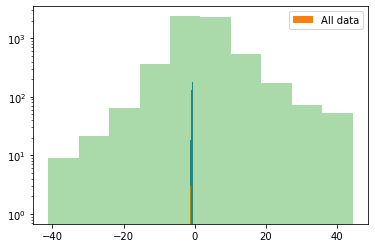

In [334]:
plt.hist(per_0['pmra'])
plt.hist(per_1['pmra'], label ="All data")
plt.hist(per_1m['pmra'], alpha =0.4)
plt.yscale('log')
plt.legend()
plt.show()

Text(0.5, 0, '$G_{BP}-G_{RP}$')

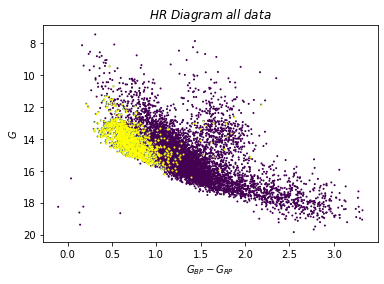

In [338]:
plt.scatter(per['bp_rp'], per['g'], s =1,c =per['label'], cmap='viridis')
plt.scatter(per_0['bp_rp'], per_0['g'], s =1, color ='yellow')
plt.title('$HR$ $Diagram$ $all$ $data$')
plt.gca().invert_yaxis()
plt.ylabel('$G$')
plt.xlabel('$G_{BP}-G_{RP}$')
#plt.gca().invert_xaxis()

Text(0.5, 0, '$G_{BP}-G_{RP}$')

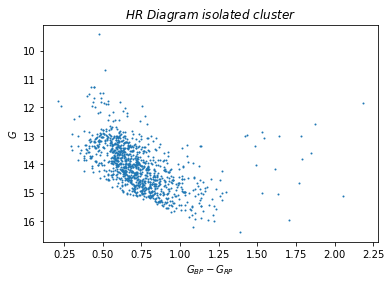

In [339]:
plt.scatter(per_0['bp_rp'], per_0['g'], s =1, cmap='viridis')
plt.title('$HR$ $Diagram$ $isolated$ $cluster$')
plt.gca().invert_yaxis()
plt.ylabel('$G$')
plt.xlabel('$G_{BP}-G_{RP}$')
#plt.gca().invert_xaxis()

In [107]:
bee.head(2)

Unnamed: 0       pmra  pmra_error      pmdec  pmdec_error  parallax  \
0    330962.0   7.904629    0.047502  -7.285703     0.058602  1.089324   
1    284942.0  51.705730    0.091356 -33.836409     0.079066  4.053008   

   parallax_error          g    g_error         rp  ...         bp   bp_error  \
0        0.038126  14.290503  11.557233  13.804105  ...  14.616743  26.733914   
1        0.060830  16.214990   3.637939  15.140361  ...  17.385810   8.924683   

      bp_rp  visibility_periods_used  astrometric_chi2_al  \
0  0.812638                     11.0           125.660095   
1  2.245450                     11.0           360.445900   

   astrometric_n_good_obs_al  abs(pmra_error/pmra)  abs(pmdec_error/pmdec)  \
0                      194.0              0.006009                0.008043   
1                      317.0              0.001767                0.002337   

        UWE  label  
0  0.815395      0  
1  1.074837      0  

[2 rows x 21 columns]

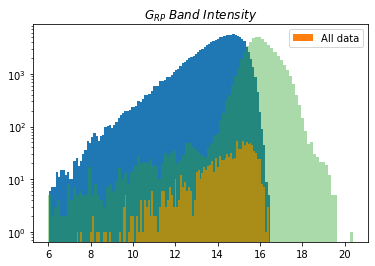

In [39]:
plt.hist(ple_0['rp'], bins =100)
plt.hist(ple_1['rp'],bins =100, label ="All data")
plt.hist(ple_1m['rp'],bins =100, alpha =0.4)
plt.title('$G_{RP}$ $Band$ $Intensity$')
plt.yscale('log')
plt.legend()
plt.show()

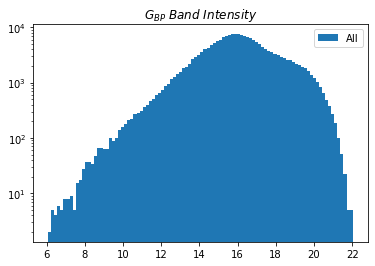

In [46]:
plt.hist(ple['bp'], bins =100, label='All')
#plt.hist(ple_1['bp'], bins =100, label ="All data")
#plt.hist(ple_1m['bp'], bins =100, alpha =0.4)
plt.title('$G_{BP}$ $Band$ $Intensity$')
plt.yscale('log')
plt.legend()
plt.show()

No handles with labels found to put in legend.


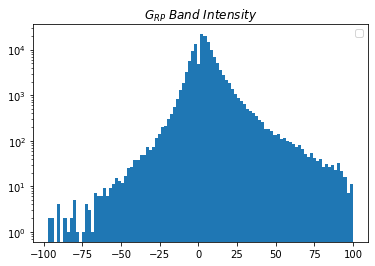

In [44]:
plt.hist(ple_0['pmra'], bins =100)
plt.title('$G_{RP}$ $Band$ $Intensity$')
plt.yscale('log')
plt.legend()
plt.show()

No handles with labels found to put in legend.


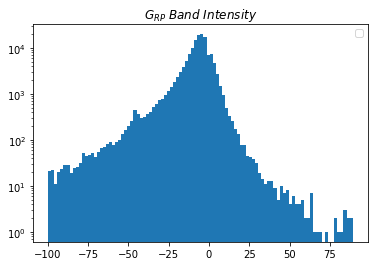

In [45]:
plt.hist(ple_0['pmdec'], bins =100)
plt.title('$G_{RP}$ $Band$ $Intensity$')
plt.yscale('log')
plt.legend()
plt.show()

No handles with labels found to put in legend.


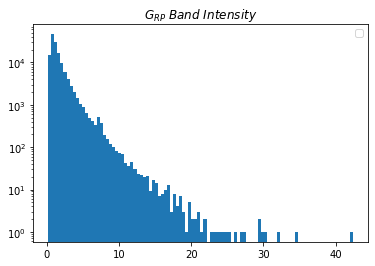

In [43]:
plt.hist(ple_0['parallax'], bins =100)
plt.title('$G_{RP}$ $Band$ $Intensity$')
plt.yscale('log')
plt.legend()
plt.show()

In [351]:
per.to_csv(os.getcwd()+'/DBSCAN'+'/perseus_DBSCAN.csv', index=False, header= True)

In [ ]:
#prueba parallax

In [48]:
perseus_dbscan = all_together(perseus, perseus_p, 1,1, 0.001, 15 )    

len(df_split_set):  1
len(dbscan):  1


In [49]:
perseus_dbscan_label = np.array(perseus_dbscan[0]['label'])
perseus_dbscan[1]['label'] = perseus_dbscan_label

In [50]:
perseus_dbscan[1].groupby(['label']).count()

Unnamed: 0  pmra  pmra_error  pmdec  pmdec_error  parallax  \
label                                                               
-1           6075  6075        6075   6075         6075      6075   
 0            995   995         995    995          995       995   

       parallax_error     g  g_error    rp  rp_error    bp  bp_error  bp_rp  \
label                                                                         
-1               6075  6075     6075  6075      6075  6075      6075   6075   
 0                995   995      995   995       995   995       995    995   

       visibility_periods_used  astrometric_chi2_al  \
label                                                 
-1                        6075                 6075   
 0                         995                  995   

       astrometric_n_good_obs_al  abs(pmra_error/pmra)  \
label                                                    
-1                          6075                  6075   
 0                           995                   995   

       abs(pmdec_error/pmdec)   UWE  
label                                
-1                       6075  6075  
 0                        995   995

In [51]:
per = perseus_dbscan[1].copy()

In [ ]:
ple.loc[ple['label']> 1, "label"] = 0
ple.loc[ple['parallax']< 5, "label"] = 0

In [52]:
per_0 =  per.loc[per['label'] >= 0]
per_1m=  per.loc[per['label'] == -1] 

In [53]:
per.groupby(['label']).count()

Unnamed: 0  pmra  pmra_error  pmdec  pmdec_error  parallax  \
label                                                               
-1           6075  6075        6075   6075         6075      6075   
 0            995   995         995    995          995       995   

       parallax_error     g  g_error    rp  rp_error    bp  bp_error  bp_rp  \
label                                                                         
-1               6075  6075     6075  6075      6075  6075      6075   6075   
 0                995   995      995   995       995   995       995    995   

       visibility_periods_used  astrometric_chi2_al  \
label                                                 
-1                        6075                 6075   
 0                         995                  995   

       astrometric_n_good_obs_al  abs(pmra_error/pmra)  \
label                                                    
-1                          6075                  6075   
 0                           995                   995   

       abs(pmdec_error/pmdec)   UWE  
label                                
-1                       6075  6075  
 0                        995   995

Text(0.5, 0, '$G_{BP}-G_{RP}$')

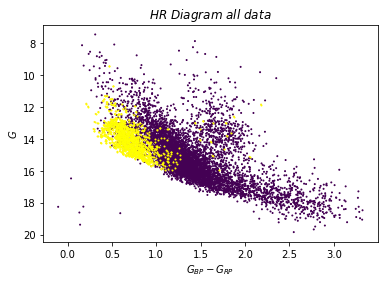

In [54]:
plt.scatter(per['bp_rp'], per['g'], s =1,c =per['label'], cmap='viridis')
plt.scatter(per_0['bp_rp'], per_0['g'], s =1, color ='yellow')
plt.title('$HR$ $Diagram$ $all$ $data$')
plt.gca().invert_yaxis()
plt.ylabel('$G$')
plt.xlabel('$G_{BP}-G_{RP}$')

Text(0.5, 0, '$G_{BP}-G_{RP}$')

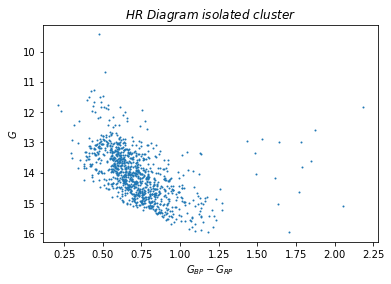

In [55]:
plt.scatter(per_0['bp_rp'], per_0['g'], s =1, cmap='viridis')
plt.title('$HR$ $Diagram$ $isolated$ $cluster$')
plt.gca().invert_yaxis()
plt.ylabel('$G$')
plt.xlabel('$G_{BP}-G_{RP}$')
#plt.gca().invert_xaxis()

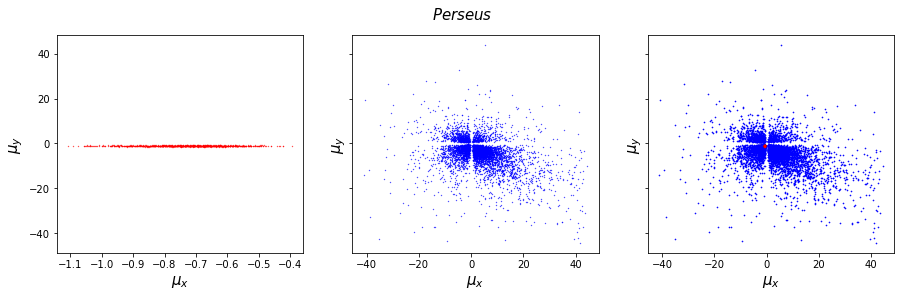

In [60]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharey=True,figsize=(15, 4))

ax0.scatter(per_0['pmra'], per_0['pmdec'], s =0.1, color ='red')
ax0.set_xlabel('$\mu_x$', fontsize = 15)
ax0.set_ylabel('$\mu_y$', fontsize = 15)


ax1.scatter(per_1m['pmra'], per_1m['pmdec'], s =0.1, color ='blue')
#ax1.scatter(ple_1m['pmra'], ple_1m['pmdec'], s =0.1, color ='blue')
ax1.set_xlabel('$\mu_x$', fontsize = 15)
ax1.set_ylabel('$\mu_y$', fontsize = 15)

ax2.scatter(per_1m['pmra'], per_1m['pmdec'], s =0.4, color ='blue')
ax2.scatter(per_0['pmra'], per_0['pmdec'], s =0.01,  color ='red')
#ax2.scatter(ple_1['pmra'], ple_1['pmdec'], s =6, color= 'red')
ax2.set_xlabel('$\mu_x$', fontsize = 15)
ax2.set_ylabel('$\mu_y$', fontsize = 15)

fig.suptitle('$Perseus$', fontsize = 15)
plt.show()

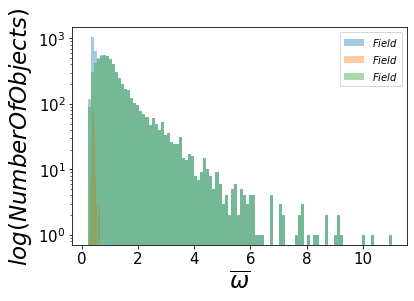

In [61]:
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.hist(per['parallax'], bins =100 , alpha = 0.4, label = '$Field$')
plt.hist(per_0['parallax'], bins =100 , alpha = 0.4, label = '$Perseus$')
plt.hist(per_1m['parallax'], bins =100 , alpha = 0.4, label = '$Field$')
#plt.hist(ple_1['parallax'], bins =100 , alpha = 0.4,  label = '$Pleiades$')
#plt.title('$G_{RP}$ $Band$ $Intensity$', fontsize = 17)
plt.yscale('log')
plt.xlabel('$\overline{\omega}$', fontsize = 23)
plt.ylabel('$log(NumberOfObjects)$', fontsize = 23)
plt.legend()
plt.show()

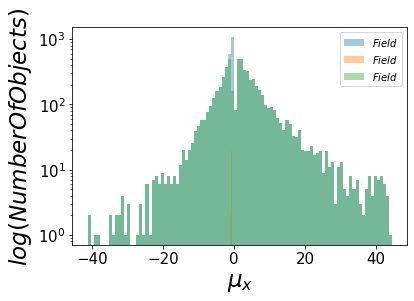

In [62]:
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.hist(per['pmra'], bins =100 , alpha = 0.4, label = '$Field$')
plt.hist(per_0['pmra'], bins =100 , alpha = 0.4, label = '$Perseus$')
plt.hist(per_1m['pmra'], bins =100 , alpha = 0.4, label = '$Field$')
#plt.hist(per_1['pmra'], bins =100 , alpha = 0.4,  label = '$Pleiades$')
#plt.title('$G_{RP}$ $Band$ $Intensity$', fontsize = 17)
plt.yscale('log')
plt.xlabel('$\mu_x$', fontsize = 23)
plt.ylabel('$log(NumberOfObjects)$', fontsize = 23)
plt.legend()
plt.show()

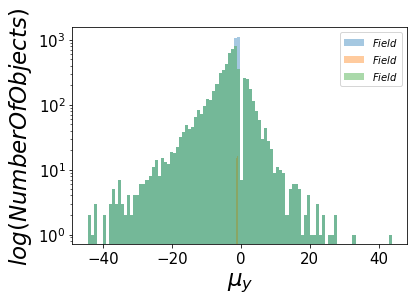

In [63]:
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.hist(per['pmdec'], bins =100 , alpha = 0.4, label = '$Field$')
plt.hist(per_0['pmdec'], bins =100 , alpha = 0.4, label = '$Field$')
plt.hist(per_1m['pmdec'], bins =100 , alpha = 0.4, label = '$Field$')
#plt.hist(per_1['pmdec'], bins =100 , alpha = 0.4,  label = '$Pleiades$')
#plt.title('$G_{RP}$ $Band$ $Intensity$', fontsize = 17)
plt.yscale('log')
plt.xlabel('$\mu_y$', fontsize = 23)
plt.ylabel('$log(NumberOfObjects)$', fontsize = 23)
plt.legend()
plt.show()

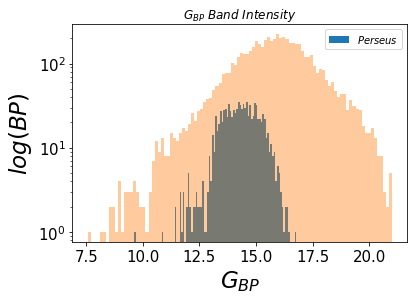

In [377]:
plt.hist(per_0['bp'], bins =100, label ="$Perseus$")
#plt.hist(per_1['bp'],bins =100, label ="$Perseus$")
plt.hist(per_1m['bp'],bins =100, alpha =0.4)
plt.title('$G_{BP}$ $Band$ $Intensity$')
plt.yscale('log')
plt.xlabel('$G_{BP}$', fontsize = 23)
plt.ylabel('$log(BP)$', fontsize = 23)
plt.legend()
plt.show()

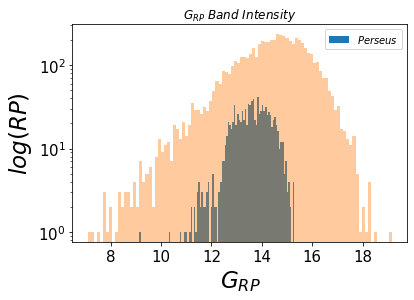

In [379]:
plt.hist(per_0['rp'], bins =100, label ="$Perseus$")
#plt.hist(hya_1['rp'],bins =100, label ="Hyades")
plt.hist(per_1m['rp'],bins =100, alpha =0.4)
plt.title('$G_{RP}$ $Band$ $Intensity$')
plt.yscale('log')
plt.xlabel('$G_{RP}$', fontsize = 23)
plt.ylabel('$log(RP)$', fontsize = 23)
plt.legend()
plt.show()

In [64]:
per.to_csv(os.getcwd()+'/DBSCAN'+'/perseus_DBSCAN_with_parallax.csv', index=False, header= True)

#  Pleiades DBSCAN

In [83]:
#prueba parallax
pleiades_dbscan = all_together(pleiades, pleiades_p, 1,9, 0.009, 40 )    

len(df_split_set):  9
len(dbscan):  9


In [84]:
pleiades_dbscan_label = np.array(pleiades_dbscan[0]['label'])
pleiades_dbscan[1]['label'] = pleiades_dbscan_label

In [85]:
pleiades_dbscan[1].groupby(['label']).count()

Unnamed: 0   pmra  pmra_error  pmdec  pmdec_error  parallax  \
label                                                                
-1          90337  90337       90337  90337        90337     90337   
 0          96127  96127       96127  96127        96127     96127   
 1          13019  13019       13019  13019        13019     13019   
 2            185    185         185    185          185       185   

       parallax_error      g  g_error     rp  rp_error     bp  bp_error  \
label                                                                     
-1              90337  90337    90337  90337     90337  90337     90337   
 0              96127  96127    96127  96127     96127  96127     96127   
 1              13019  13019    13019  13019     13019  13019     13019   
 2                185    185      185    185       185    185       185   

       bp_rp  visibility_periods_used  astrometric_chi2_al  \
label                                                        
-1     90337                    90337                90337   
 0     96127                    96127                96127   
 1     13019                    13019                13019   
 2       185                      185                  185   

       astrometric_n_good_obs_al  abs(pmra_error/pmra)  \
label                                                    
-1                         90337                 90337   
 0                         96127                 96127   
 1                         13019                 13019   
 2                           185                   185   

       abs(pmdec_error/pmdec)    UWE  
label                                 
-1                      90337  90337  
 0                      96127  96127  
 1                      13019  13019  
 2                        185    185

In [86]:
ple = pleiades_dbscan[1].copy()

In [87]:
ple.loc[ple['label']> 1, "label"] = 0
ple.loc[ple['parallax']< 5, "label"] = 0

In [88]:
ple_0 =  ple.loc[ple['label'] == 0 ]
ple_1m=  ple.loc[ple['label'] == -1] 
ple_1 =  ple.loc[ple['label'] == 1]

In [89]:
ple.groupby(['label']).count()

Unnamed: 0    pmra  pmra_error   pmdec  pmdec_error  parallax  \
label                                                                  
-1          10727   10727       10727   10727        10727     10727   
 0         188457  188457      188457  188457       188457    188457   
 1            484     484         484     484          484       484   

       parallax_error       g  g_error      rp  rp_error      bp  bp_error  \
label                                                                        
-1              10727   10727    10727   10727     10727   10727     10727   
 0             188457  188457   188457  188457    188457  188457    188457   
 1                484     484      484     484       484     484       484   

        bp_rp  visibility_periods_used  astrometric_chi2_al  \
label                                                         
-1      10727                    10727                10727   
 0     188457                   188457               188457   
 1        484                      484                  484   

       astrometric_n_good_obs_al  abs(pmra_error/pmra)  \
label                                                    
-1                         10727                 10727   
 0                        188457                188457   
 1                           484                   484   

       abs(pmdec_error/pmdec)     UWE  
label                                  
-1                      10727   10727  
 0                     188457  188457  
 1                        484     484

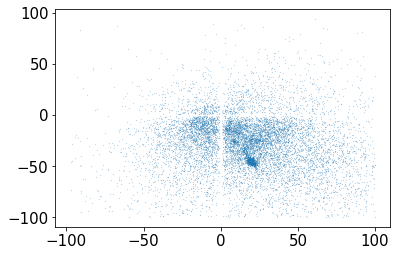

In [90]:
plt.scatter(ple_1m['pmra'], ple_1m['pmdec'], s =0.01)

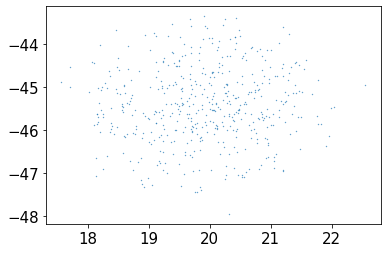

In [91]:
plt.scatter(ple_1['pmra'], ple_1['pmdec'], s =0.1)

Text(0.5, 0, '$\\mu_x$')

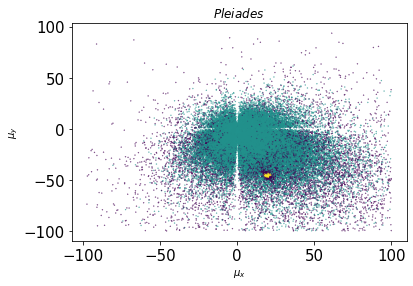

In [92]:
plt.scatter(ple['pmra'], ple['pmdec'], s =0.1,c =ple['label'], cmap='viridis')
plt.title('$Pleiades$')
plt.ylabel('$\mu_y$')
plt.xlabel('$\mu_x$')
#plt.xlim(-50,50)
#plt.ylim(-50,50)

Text(0.5, 0, '$G_{BP}-G_{RP}$')

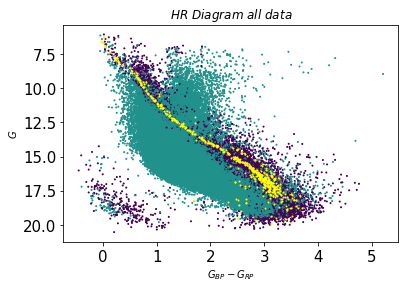

In [93]:
plt.scatter(ple['bp_rp'], ple['g'], s =1,c =ple['label'], cmap='viridis')
plt.scatter(ple_1['bp_rp'], ple_1['g'], s =1, color ='yellow')
plt.title('$HR$ $Diagram$ $all$ $data$')
plt.gca().invert_yaxis()
plt.ylabel('$G$')
plt.xlabel('$G_{BP}-G_{RP}$')
#plt.gca().invert_xaxis()

Text(0.5, 0, '$G_{BP}-G_{RP}$')

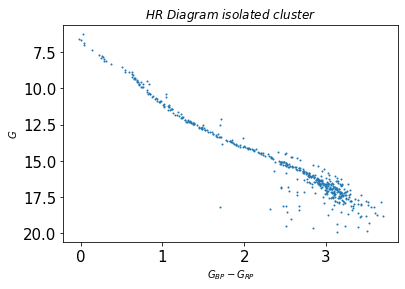

In [94]:
plt.scatter(ple_1['bp_rp'], ple_1['g'], s =1, cmap='viridis')
plt.title('$HR$ $Diagram$ $isolated$ $cluster$')
plt.gca().invert_yaxis()
plt.ylabel('$G$')
plt.xlabel('$G_{BP}-G_{RP}$')
#plt.gca().invert_xaxis()

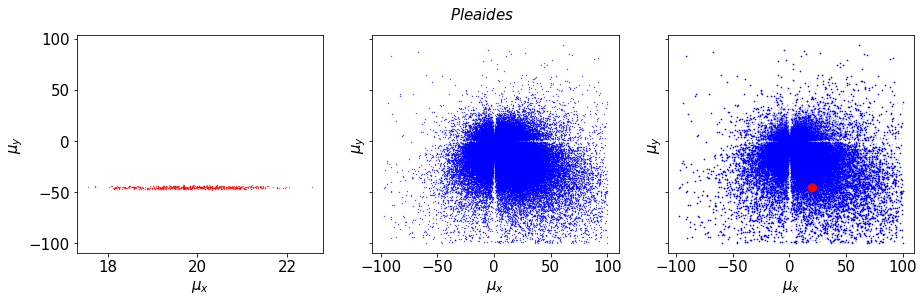

In [95]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharey=True,figsize=(15, 4))

ax0.scatter(ple_1['pmra'], ple_1['pmdec'], s =0.1, color ='red')
ax0.set_xlabel('$\mu_x$', fontsize = 15)
ax0.set_ylabel('$\mu_y$', fontsize = 15)


ax1.scatter(ple_0['pmra'], ple_0['pmdec'], s =0.1, color ='blue')
ax1.scatter(ple_1m['pmra'], ple_1m['pmdec'], s =0.1, color ='blue')
ax1.set_xlabel('$\mu_x$', fontsize = 15)
ax1.set_ylabel('$\mu_y$', fontsize = 15)

ax2.scatter(ple_1m['pmra'], ple_1m['pmdec'], s =0.4, color ='blue')
ax2.scatter(ple_0['pmra'], ple_0['pmdec'], s =0.01,  color ='blue')
ax2.scatter(ple_1['pmra'], ple_1['pmdec'], s =6, color= 'red')
ax2.set_xlabel('$\mu_x$', fontsize = 15)
ax2.set_ylabel('$\mu_y$', fontsize = 15)

fig.suptitle('$Pleaides$', fontsize = 15)
plt.show()

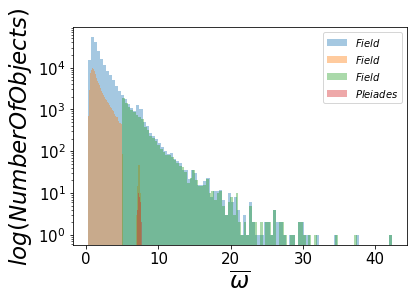

In [96]:
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.hist(ple['parallax'], bins =100 , alpha = 0.4, label = '$Field$')
plt.hist(ple_0['parallax'], bins =100 , alpha = 0.4, label = '$Field$')
plt.hist(ple_1m['parallax'], bins =100 , alpha = 0.4, label = '$Field$')
plt.hist(ple_1['parallax'], bins =100 , alpha = 0.4,  label = '$Pleiades$')
#plt.title('$G_{RP}$ $Band$ $Intensity$', fontsize = 17)
plt.yscale('log')
plt.xlabel('$\overline{\omega}$', fontsize = 23)
plt.ylabel('$log(NumberOfObjects)$', fontsize = 23)
plt.legend()
plt.show()

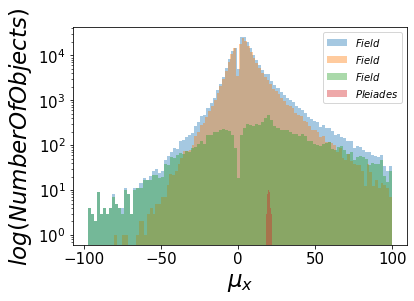

In [97]:
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.hist(ple['pmra'], bins =100 , alpha = 0.4, label = '$Field$')
plt.hist(ple_0['pmra'], bins =100 , alpha = 0.4, label = '$Field$')
plt.hist(ple_1m['pmra'], bins =100 , alpha = 0.4, label = '$Field$')
plt.hist(ple_1['pmra'], bins =100 , alpha = 0.4,  label = '$Pleiades$')
#plt.title('$G_{RP}$ $Band$ $Intensity$', fontsize = 17)
plt.yscale('log')
plt.xlabel('$\mu_x$', fontsize = 23)
plt.ylabel('$log(NumberOfObjects)$', fontsize = 23)
plt.legend()
plt.show()

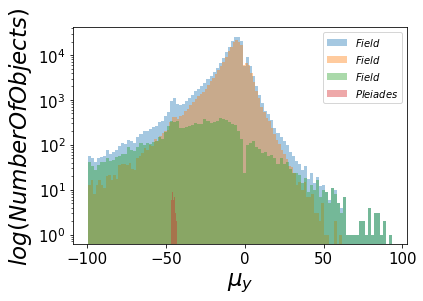

In [98]:
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.hist(ple['pmdec'], bins =100 , alpha = 0.4, label = '$Field$')
plt.hist(ple_0['pmdec'], bins =100 , alpha = 0.4, label = '$Field$')
plt.hist(ple_1m['pmdec'], bins =100 , alpha = 0.4, label = '$Field$')
plt.hist(ple_1['pmdec'], bins =100 , alpha = 0.4,  label = '$Pleiades$')
#plt.title('$G_{RP}$ $Band$ $Intensity$', fontsize = 17)
plt.yscale('log')
plt.xlabel('$\mu_y$', fontsize = 23)
plt.ylabel('$log(NumberOfObjects)$', fontsize = 23)
plt.legend()
plt.show()

In [372]:
plt.hist(plei_0['bp'], bins =100)
plt.hist(plei_1['bp'],bins =100, label ="$Pleaides$")
plt.hist(plei_1m['bp'],bins =100, alpha =0.4)
plt.title('$G_{BP}$ $Band$ $Intensity$')
plt.yscale('log')
plt.xlabel('$G_{BP}$', fontsize = 23)
plt.ylabel('$log(BP)$', fontsize = 23)
plt.legend()
plt.show()

NameError: name 'plei_0' is not defined

In [ ]:
plt.hist(plei_0['bp'], bins =100)
plt.hist(plei_1['bp'],bins =100, label ="Hyades")
plt.hist(plei_1m['bp'],bins =100, alpha =0.4)
plt.title('$G_{BP}$ $Band$ $Intensity$')
plt.yscale('log')
plt.xlabel('$G_{BP}$', fontsize = 23)
plt.ylabel('$log(BP)$', fontsize = 23)
plt.legend()
plt.show()

In [99]:
ple.to_csv(os.getcwd()+'/DBSCAN'+'/pleiades_DBSCAN_with_parallax.csv', index=False, header= True)

In [ ]:
#fin prueba

In [490]:
pleiades_dbscan = all_together(pleiades, pleiades_p, 1,10, 0.009, 40 )    

len(df_split_set):  10
len(dbscan):  10


In [491]:
pleiades_dbscan_label = np.array(pleiades_dbscan[0]['label'])
pleiades_dbscan[1]['label'] = pleiades_dbscan_label

In [492]:
pleiades_dbscan[1].groupby(['label']).count()

Unnamed: 0    pmra  pmra_error   pmdec  pmdec_error  parallax  \
label                                                                  
-1          40114   40114       40114   40114        40114     40114   
 0         158148  158148      158148  158148       158148    158148   
 1           1251    1251        1251    1251         1251      1251   
 2            155     155         155     155          155       155   

       parallax_error       g  g_error      rp  rp_error      bp  bp_error  \
label                                                                        
-1              40114   40114    40114   40114     40114   40114     40114   
 0             158148  158148   158148  158148    158148  158148    158148   
 1               1251    1251     1251    1251      1251    1251      1251   
 2                155     155      155     155       155     155       155   

        bp_rp  visibility_periods_used  astrometric_chi2_al  \
label                                                         
-1      40114                    40114                40114   
 0     158148                   158148               158148   
 1       1251                     1251                 1251   
 2        155                      155                  155   

       astrometric_n_good_obs_al  abs(pmra_error/pmra)  \
label                                                    
-1                         40114                 40114   
 0                        158148                158148   
 1                          1251                  1251   
 2                           155                   155   

       abs(pmdec_error/pmdec)     UWE  
label                                  
-1                      40114   40114  
 0                     158148  158148  
 1                       1251    1251  
 2                        155     155

In [355]:
ple = pleiades_dbscan[1].copy()

In [493]:
ple.loc[ple['label']> 1, "label"] = 0

In [360]:
ple_0 =  ple.loc[ple['label'] == 0 ]
ple_1m=  ple.loc[ple['label'] == -1] 
ple_1 =  ple.loc[ple['label'] == 1]

In [494]:
ple.groupby(['label']).count()

Unnamed: 0    pmra  pmra_error   pmdec  pmdec_error  parallax  \
label                                                                  
-1          39341   39341       39341   39341        39341     39341   
 0         159064  159064      159064  159064       159064    159064   
 1           1263    1263        1263    1263         1263      1263   

       parallax_error       g  g_error      rp  rp_error      bp  bp_error  \
label                                                                        
-1              39341   39341    39341   39341     39341   39341     39341   
 0             159064  159064   159064  159064    159064  159064    159064   
 1               1263    1263     1263    1263      1263    1263      1263   

        bp_rp  visibility_periods_used  astrometric_chi2_al  \
label                                                         
-1      39341                    39341                39341   
 0     159064                   159064               159064   
 1       1263                     1263                 1263   

       astrometric_n_good_obs_al  abs(pmra_error/pmra)  \
label                                                    
-1                         39341                 39341   
 0                        159064                159064   
 1                          1263                  1263   

       abs(pmdec_error/pmdec)     UWE  
label                                  
-1                      39341   39341  
 0                     159064  159064  
 1                       1263    1263

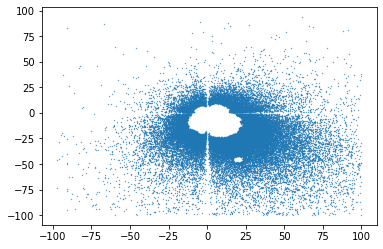

In [495]:
plt.scatter(ple_1m['pmra'], ple_1m['pmdec'], s =0.1)

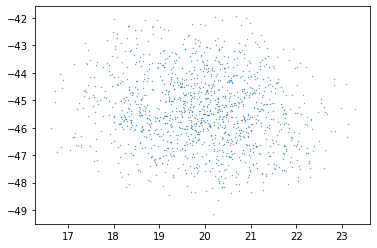

In [496]:
plt.scatter(ple_1['pmra'], ple_1['pmdec'], s =0.1)

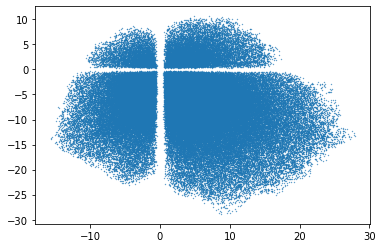

In [497]:
plt.scatter(ple_0['pmra'], ple_0['pmdec'], s =0.1)

Text(0.5, 0, '$\\mu_x$')

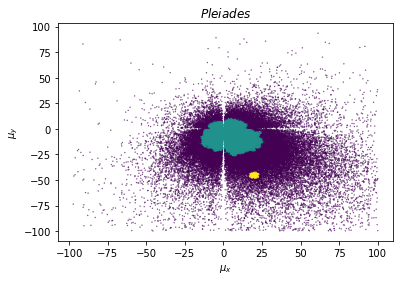

In [498]:
plt.scatter(ple['pmra'], ple['pmdec'], s =0.1,c =ple['label'], cmap='viridis')
plt.title('$Pleiades$')
plt.ylabel('$\mu_y$')
plt.xlabel('$\mu_x$')
#plt.xlim(-50,50)
#plt.ylim(-50,50)

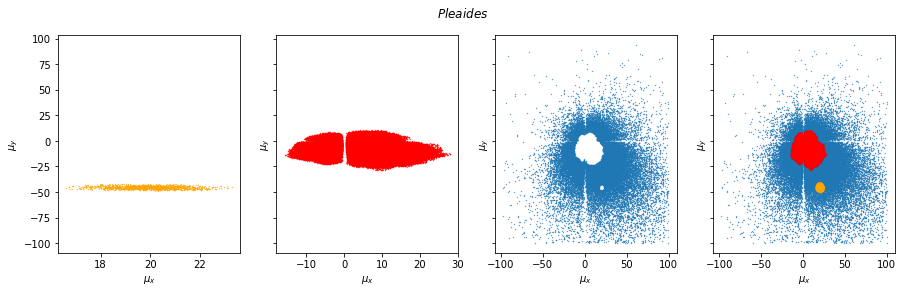

In [499]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=4, sharey=True,figsize=(15, 4))

ax0.scatter(ple_1['pmra'], ple_1['pmdec'], s =0.1, color ='orange')
ax0.set_xlabel('$\mu_x$')
ax0.set_ylabel('$\mu_y$')


ax1.scatter(ple_0['pmra'], ple_0['pmdec'], s =0.1, color ='red')
ax1.set_xlabel('$\mu_x$')
ax1.set_ylabel('$\mu_y$')

ax2.scatter(ple_1m['pmra'], ple_1m['pmdec'], s =0.1)
ax2.set_xlabel('$\mu_x$')
ax2.set_ylabel('$\mu_y$')

ax3.scatter(ple_1m['pmra'], ple_1m['pmdec'], s =0.1)
ax3.scatter(ple_1['pmra'], ple_1['pmdec'], s =6, color= 'orange')
ax3.scatter(ple_0['pmra'], ple_0['pmdec'], s =0.01, color= 'red')
ax3.set_xlabel('$\mu_x$')
ax3.set_ylabel('$\mu_y$')

fig.suptitle('$Pleaides$')
plt.show()

Text(0.5, 0, '$G_{BP}-G_{RP}$')

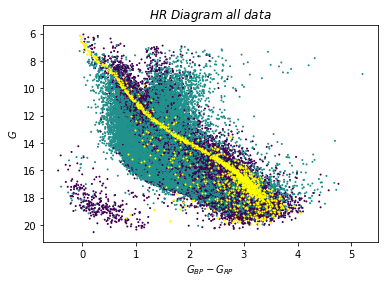

In [500]:
plt.scatter(ple['bp_rp'], ple['g'], s =1,c =ple['label'], cmap='viridis')
plt.scatter(ple_1['bp_rp'], ple_1['g'], s =1, color ='yellow')
plt.title('$HR$ $Diagram$ $all$ $data$')
plt.gca().invert_yaxis()
plt.ylabel('$G$')
plt.xlabel('$G_{BP}-G_{RP}$')
#plt.gca().invert_xaxis()

Text(0.5, 0, '$G_{BP}-G_{RP}$')

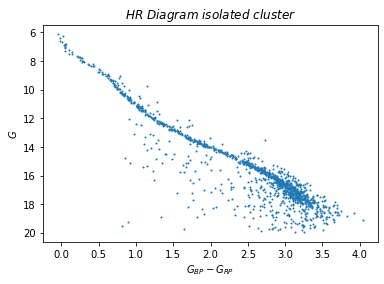

In [501]:
plt.scatter(ple_1['bp_rp'], ple_1['g'], s =1, cmap='viridis')
plt.title('$HR$ $Diagram$ $isolated$ $cluster$')
plt.gca().invert_yaxis()
plt.ylabel('$G$')
plt.xlabel('$G_{BP}-G_{RP}$')
#plt.gca().invert_xaxis()

In [502]:
ple.to_csv(os.getcwd()+'/DBSCAN'+'/pleiades_DBSCAN.csv', index=False, header= True)

#  Beehive DBSCAN

In [445]:
beehive_dbscan = all_together(beehive, beehive_p, 1,10, 0.01, 40 )   

len(df_split_set):  10
len(dbscan):  10


In [504]:
beehive_dbscan_label = np.array(beehive_dbscan[0]['label'])
beehive_dbscan[1]['label'] = beehive_dbscan_label

In [505]:
beehive_dbscan[1].groupby(['label']).count()

Unnamed: 0    pmra  pmra_error   pmdec  pmdec_error  parallax  \
label                                                                  
-1          30673   30673       30673   30673        30673     30673   
 0         100488  100488      100488  100488       100488    100488   
 1           1223    1223        1223    1223         1223      1223   
 2            112     112         112     112          112       112   

       parallax_error       g  g_error      rp  rp_error      bp  bp_error  \
label                                                                        
-1              30673   30673    30673   30673     30673   30673     30673   
 0             100488  100488   100488  100488    100488  100488    100488   
 1               1223    1223     1223    1223      1223    1223      1223   
 2                112     112      112     112       112     112       112   

        bp_rp  visibility_periods_used  astrometric_chi2_al  \
label                                                         
-1      30673                    30673                30673   
 0     100488                   100488               100488   
 1       1223                     1223                 1223   
 2        112                      112                  112   

       astrometric_n_good_obs_al  abs(pmra_error/pmra)  \
label                                                    
-1                         30673                 30673   
 0                        100488                100488   
 1                          1223                  1223   
 2                           112                   112   

       abs(pmdec_error/pmdec)     UWE  
label                                  
-1                      30673   30673  
 0                     100488  100488  
 1                       1223    1223  
 2                        112     112

In [506]:
bee = beehive_dbscan[1].copy()

In [507]:
bee.loc[bee['label']> 1, "label"] = -1

In [508]:
bee_0 =  bee.loc[bee['label'] == 0 ]
bee_1m=  bee.loc[bee['label'] == -1] 
bee_1 =  bee.loc[bee['label'] == 1]

In [509]:
bee.groupby(['label']).count()

Unnamed: 0    pmra  pmra_error   pmdec  pmdec_error  parallax  \
label                                                                  
-1          30785   30785       30785   30785        30785     30785   
 0         100488  100488      100488  100488       100488    100488   
 1           1223    1223        1223    1223         1223      1223   

       parallax_error       g  g_error      rp  rp_error      bp  bp_error  \
label                                                                        
-1              30785   30785    30785   30785     30785   30785     30785   
 0             100488  100488   100488  100488    100488  100488    100488   
 1               1223    1223     1223    1223      1223    1223      1223   

        bp_rp  visibility_periods_used  astrometric_chi2_al  \
label                                                         
-1      30785                    30785                30785   
 0     100488                   100488               100488   
 1       1223                     1223                 1223   

       astrometric_n_good_obs_al  abs(pmra_error/pmra)  \
label                                                    
-1                         30785                 30785   
 0                        100488                100488   
 1                          1223                  1223   

       abs(pmdec_error/pmdec)     UWE  
label                                  
-1                      30785   30785  
 0                     100488  100488  
 1                       1223    1223

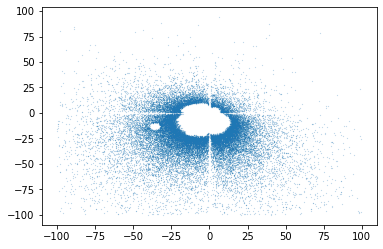

In [510]:
plt.scatter(bee_1m['pmra'], bee_1m['pmdec'], s =0.01)

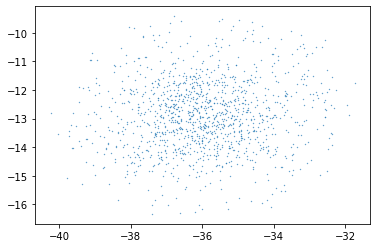

In [511]:
plt.scatter(bee_1['pmra'], bee_1['pmdec'], s =0.1)

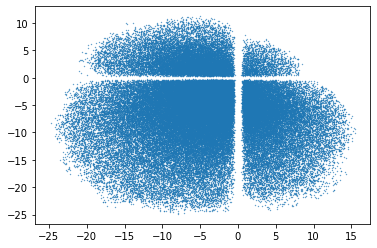

In [512]:
plt.scatter(bee_0['pmra'], bee_0['pmdec'], s =0.1)

Text(0.5, 0, '$\\mu_x$')

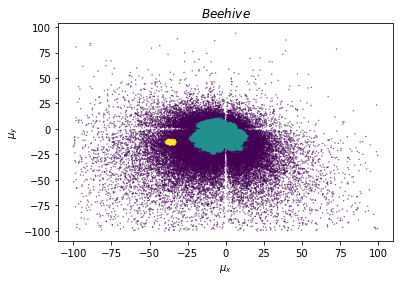

In [513]:
plt.scatter(bee['pmra'], bee['pmdec'], s =0.1,c =bee['label'], cmap='viridis')
plt.title('$Beehive$')
plt.ylabel('$\mu_y$')
plt.xlabel('$\mu_x$')
#plt.xlim(-50,50)
#plt.ylim(-50,50)

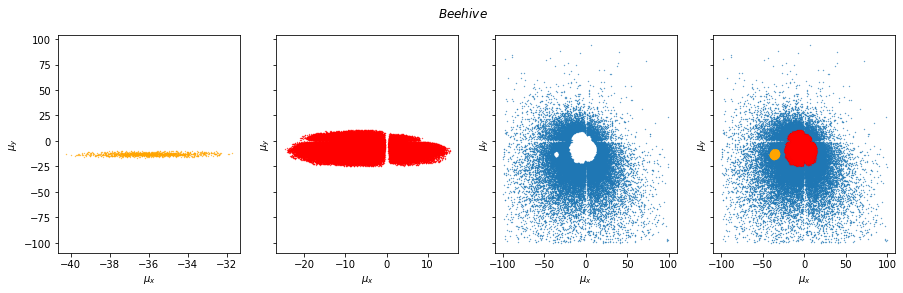

In [514]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=4, sharey=True,figsize=(15, 4))

ax0.scatter(bee_1['pmra'], bee_1['pmdec'], s =0.1, color ='orange')
ax0.set_xlabel('$\mu_x$')
ax0.set_ylabel('$\mu_y$')


ax1.scatter(bee_0['pmra'], bee_0['pmdec'], s =0.1, color ='red')
ax1.set_xlabel('$\mu_x$')
ax1.set_ylabel('$\mu_y$')

ax2.scatter(bee_1m['pmra'], bee_1m['pmdec'], s =0.1)
ax2.set_xlabel('$\mu_x$')
ax2.set_ylabel('$\mu_y$')

ax3.scatter(bee_1m['pmra'], bee_1m['pmdec'], s =0.1)
ax3.scatter(bee_1['pmra'], bee_1['pmdec'], s =6, color= 'orange')
ax3.scatter(bee_0['pmra'], bee_0['pmdec'], s =0.01, color= 'red')
ax3.set_xlabel('$\mu_x$')
ax3.set_ylabel('$\mu_y$')

fig.suptitle('$Beehive$')
plt.show()

Text(0.5, 0, '$G_{BP}-G_{RP}$')

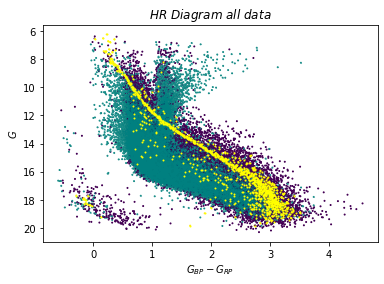

In [515]:
plt.scatter(bee['bp_rp'], bee['g'], s =1,c =bee['label'], cmap='viridis')
plt.scatter(bee_0['bp_rp'], bee_0['g'], s =0.01, color ='teal')
plt.scatter(bee_1['bp_rp'], bee_1['g'], s =1, color ='yellow')
plt.title('$HR$ $Diagram$ $all$ $data$')
plt.gca().invert_yaxis()
plt.ylabel('$G$')
plt.xlabel('$G_{BP}-G_{RP}$')
#plt.gca().invert_xaxis()

Text(0.5, 0, '$G_{BP}-G_{RP}$')

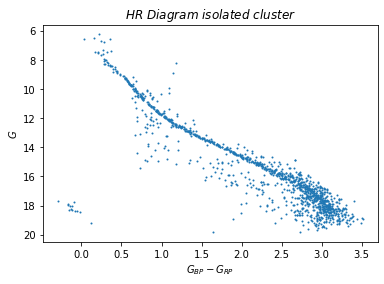

In [516]:
plt.scatter(bee_1['bp_rp'], bee_1['g'], s =1, cmap='viridis')
plt.title('$HR$ $Diagram$ $isolated$ $cluster$')
plt.gca().invert_yaxis()
plt.ylabel('$G$')
plt.xlabel('$G_{BP}-G_{RP}$')
#plt.gca().invert_xaxis()

In [517]:
bee.to_csv(os.getcwd()+'/DBSCAN'+'/beehive_DBSCAN.csv', index=False, header= True)

In [ ]:
#prueba beehive parallax

In [65]:
beehive_dbscan = all_together(beehive, beehive_p, 1,10, 0.01, 40 )  

len(df_split_set):  10
len(dbscan):  10


In [66]:
beehive_dbscan_label = np.array(beehive_dbscan[0]['label'])
beehive_dbscan[1]['label'] = beehive_dbscan_label

In [67]:
beehive_dbscan[1].groupby(['label']).count()

Unnamed: 0   pmra  pmra_error  pmdec  pmdec_error  parallax  \
label                                                                
-1          68621  68621       68621  68621        68621     68621   
 0          63147  63147       63147  63147        63147     63147   
 1            698    698         698    698          698       698   
 2             30     30          30     30           30        30   

       parallax_error      g  g_error     rp  rp_error     bp  bp_error  \
label                                                                     
-1              68621  68621    68621  68621     68621  68621     68621   
 0              63147  63147    63147  63147     63147  63147     63147   
 1                698    698      698    698       698    698       698   
 2                 30     30       30     30        30     30        30   

       bp_rp  visibility_periods_used  astrometric_chi2_al  \
label                                                        
-1     68621                    68621                68621   
 0     63147                    63147                63147   
 1       698                      698                  698   
 2        30                       30                   30   

       astrometric_n_good_obs_al  abs(pmra_error/pmra)  \
label                                                    
-1                         68621                 68621   
 0                         63147                 63147   
 1                           698                   698   
 2                            30                    30   

       abs(pmdec_error/pmdec)    UWE  
label                                 
-1                      68621  68621  
 0                      63147  63147  
 1                        698    698  
 2                         30     30

In [68]:
bee = beehive_dbscan[1].copy()

In [69]:
bee.loc[bee['label']> 1, "label"] = -1

In [70]:
bee_0 =  bee.loc[bee['label'] == 0 ]
bee_1m=  bee.loc[bee['label'] == -1] 
bee_1 =  bee.loc[bee['label'] == 1]

In [71]:
bee.groupby(['label']).count()

Unnamed: 0   pmra  pmra_error  pmdec  pmdec_error  parallax  \
label                                                                
-1          68651  68651       68651  68651        68651     68651   
 0          63147  63147       63147  63147        63147     63147   
 1            698    698         698    698          698       698   

       parallax_error      g  g_error     rp  rp_error     bp  bp_error  \
label                                                                     
-1              68651  68651    68651  68651     68651  68651     68651   
 0              63147  63147    63147  63147     63147  63147     63147   
 1                698    698      698    698       698    698       698   

       bp_rp  visibility_periods_used  astrometric_chi2_al  \
label                                                        
-1     68651                    68651                68651   
 0     63147                    63147                63147   
 1       698                      698                  698   

       astrometric_n_good_obs_al  abs(pmra_error/pmra)  \
label                                                    
-1                         68651                 68651   
 0                         63147                 63147   
 1                           698                   698   

       abs(pmdec_error/pmdec)    UWE  
label                                 
-1                      68651  68651  
 0                      63147  63147  
 1                        698    698

Text(0.5, 0, '$G_{BP}-G_{RP}$')

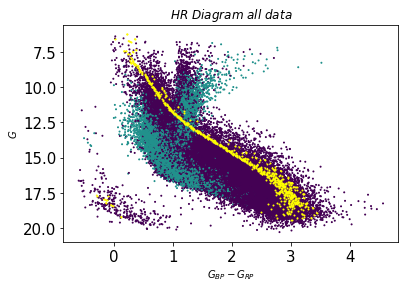

In [72]:
plt.scatter(bee['bp_rp'], bee['g'], s =1,c =bee['label'], cmap='viridis')
plt.scatter(bee_1['bp_rp'], bee_1['g'], s =1, color ='yellow')
plt.title('$HR$ $Diagram$ $all$ $data$')
plt.gca().invert_yaxis()
plt.ylabel('$G$')
plt.xlabel('$G_{BP}-G_{RP}$')
#plt.gca().invert_xaxis()

Text(0.5, 0, '$G_{BP}-G_{RP}$')

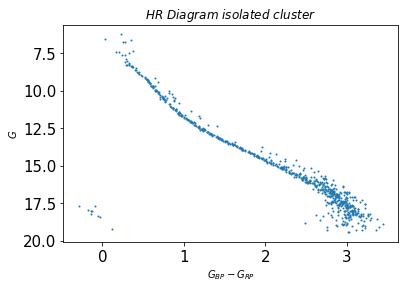

In [73]:
plt.scatter(bee_1['bp_rp'], bee_1['g'], s =1, cmap='viridis')
plt.title('$HR$ $Diagram$ $isolated$ $cluster$')
plt.gca().invert_yaxis()
plt.ylabel('$G$')
plt.xlabel('$G_{BP}-G_{RP}$')
#plt.gca().invert_xaxis()

In [383]:
len(bee_1['bp_rp'])

698

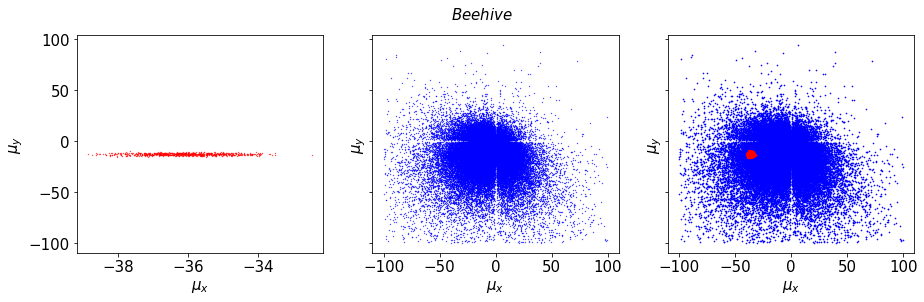

In [74]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharey=True,figsize=(15, 4))

ax0.scatter(bee_1['pmra'], bee_1['pmdec'], s =0.1, color ='red')
ax0.set_xlabel('$\mu_x$', fontsize = 15)
ax0.set_ylabel('$\mu_y$', fontsize = 15)


ax1.scatter(bee_0['pmra'], bee_0['pmdec'], s =0.1, color ='blue')
ax1.scatter(bee_1m['pmra'], bee_1m['pmdec'], s =0.1, color ='blue')
ax1.set_xlabel('$\mu_x$', fontsize = 15)
ax1.set_ylabel('$\mu_y$', fontsize = 15)

ax2.scatter(bee_1m['pmra'], bee_1m['pmdec'], s =0.4, color ='blue')
ax2.scatter(bee_0['pmra'], bee_0['pmdec'], s =0.01,  color ='blue')
ax2.scatter(bee_1['pmra'], bee_1['pmdec'], s =6, color= 'red')
ax2.set_xlabel('$\mu_x$', fontsize = 15)
ax2.set_ylabel('$\mu_y$', fontsize = 15)

fig.suptitle('$Beehive$', fontsize = 15)
plt.show()

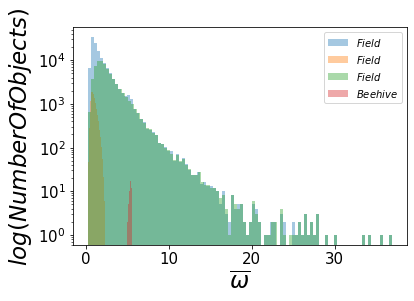

In [80]:
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.hist(bee['parallax'], bins =100 , alpha = 0.4, label = '$Field$')
plt.hist(bee_0['parallax'], bins =100 , alpha = 0.4, label = '$Field$')
plt.hist(bee_1m['parallax'], bins =100 , alpha = 0.4, label = '$Field$')
plt.hist(bee_1['parallax'], bins =100 , alpha = 0.4,  label = '$Beehive$')
#plt.title('$G_{RP}$ $Band$ $Intensity$', fontsize = 17)
plt.yscale('log')
plt.xlabel('$\overline{\omega}$', fontsize = 23)
plt.ylabel('$log(NumberOfObjects)$', fontsize = 23)
plt.legend()
plt.show()

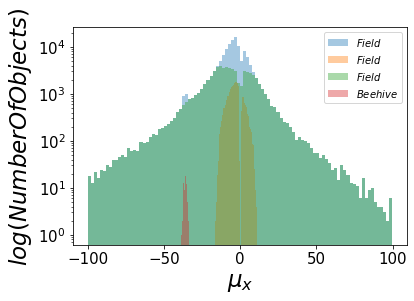

In [76]:
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.hist(bee['pmra'], bins =100 , alpha = 0.4, label = '$Field$')
plt.hist(bee_0['pmra'], bins =100 , alpha = 0.4, label = '$Field$')
plt.hist(bee_1m['pmra'], bins =100 , alpha = 0.4, label = '$Field$')
plt.hist(bee_1['pmra'], bins =100 , alpha = 0.4,  label = '$Beehive$')
#plt.title('$G_{RP}$ $Band$ $Intensity$', fontsize = 17)
plt.yscale('log')
plt.xlabel('$\mu_x$', fontsize = 23)
plt.ylabel('$log(NumberOfObjects)$', fontsize = 23)
plt.legend()
plt.show()

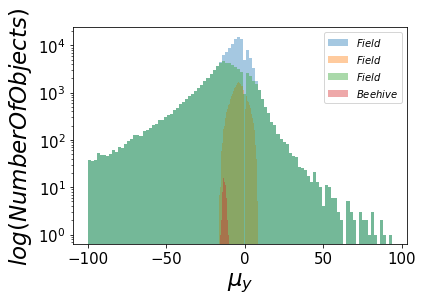

In [77]:
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.hist(bee['pmdec'], bins =100 , alpha = 0.4, label = '$Field$')
plt.hist(bee_0['pmdec'], bins =100 , alpha = 0.4, label = '$Field$')
plt.hist(bee_1m['pmdec'], bins =100 , alpha = 0.4, label = '$Field$')
plt.hist(bee_1['pmdec'], bins =100 , alpha = 0.4,  label = '$Beehive$')
#plt.title('$G_{RP}$ $Band$ $Intensity$', fontsize = 17)
plt.yscale('log')
plt.xlabel('$\mu_y$', fontsize = 23)
plt.ylabel('$log(NumberOfObjects)$', fontsize = 23)
plt.legend()
plt.show()

In [82]:
bee.to_csv(os.getcwd()+'/DBSCAN'+'/beehive_DBSCAN_with_parallax.csv', index=False, header= True)

# NGC2451 DBSCAN

In [ ]:
#with parallax

In [156]:
ngc_dbscan = all_together(ngc, ngc_p, 1,8, 0.01, 30 )   

len(df_split_set):  8
len(dbscan):  8


In [176]:
ngc_dbscan = all_together(ngc, ngc_p, 1,3, 0.01, 30 )   

len(df_split_set):  3
len(dbscan):  3


In [177]:
ngc_dbscan_label = np.array(ngc_dbscan[0]['label'])
ngc_dbscan[1]['label'] = ngc_dbscan_label

In [178]:
ngcc = ngc_dbscan[1].copy()

In [179]:
ngcc.groupby(['label']).count()

Unnamed: 0    pmra  pmra_error   pmdec  pmdec_error  parallax  \
label                                                                  
-1          19870   19870       19870   19870        19870     19870   
 0         134936  134936      134936  134936       134936    134936   
 1            396     396         396     396          396       396   
 2             42      42          42      42           42        42   

       parallax_error       g  g_error      rp  rp_error      bp  bp_error  \
label                                                                        
-1              19870   19870    19870   19870     19870   19870     19870   
 0             134936  134936   134936  134936    134936  134936    134936   
 1                396     396      396     396       396     396       396   
 2                 42      42       42      42        42      42        42   

        bp_rp  visibility_periods_used  astrometric_chi2_al  \
label                                                         
-1      19870                    19870                19870   
 0     134936                   134936               134936   
 1        396                      396                  396   
 2         42                       42                   42   

       astrometric_n_good_obs_al  abs(pmra_error/pmra)  \
label                                                    
-1                         19870                 19870   
 0                        134936                134936   
 1                           396                   396   
 2                            42                    42   

       abs(pmdec_error/pmdec)     UWE  
label                                  
-1                      19870   19870  
 0                     134936  134936  
 1                        396     396  
 2                         42      42

In [180]:
ngcc.loc[ngcc['label']> 1, "label"] = -1
ngcc.loc[ngcc['parallax']< 4, "label"] = -0

In [181]:
ngcc_0 =  ngcc.loc[ngcc['label'] == 0 ]
ngcc_1m=  ngcc.loc[ngcc['label'] == -1] 
ngcc_1 =  ngcc.loc[ngcc['label'] >= 1]

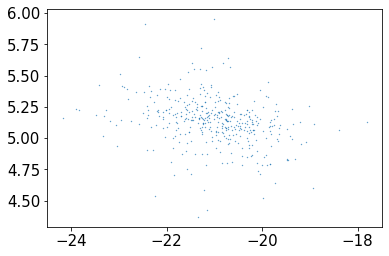

In [187]:
plt.scatter(ngcc_1['pmra'], ngcc_1['parallax'], s = 0.1)

In [188]:
ngcc.groupby(['label']).count()

Unnamed: 0    pmra  pmra_error   pmdec  pmdec_error  parallax  \
label                                                                  
-1           3433    3433        3433    3433         3433      3433   
 0         151415  151415      151415  151415       151415    151415   
 1            396     396         396     396          396       396   

       parallax_error       g  g_error      rp  rp_error      bp  bp_error  \
label                                                                        
-1               3433    3433     3433    3433      3433    3433      3433   
 0             151415  151415   151415  151415    151415  151415    151415   
 1                396     396      396     396       396     396       396   

        bp_rp  visibility_periods_used  astrometric_chi2_al  \
label                                                         
-1       3433                     3433                 3433   
 0     151415                   151415               151415   
 1        396                      396                  396   

       astrometric_n_good_obs_al  abs(pmra_error/pmra)  \
label                                                    
-1                          3433                  3433   
 0                        151415                151415   
 1                           396                   396   

       abs(pmdec_error/pmdec)     UWE  
label                                  
-1                       3433    3433  
 0                     151415  151415  
 1                        396     396

Text(0.5, 0, '$G_{BP}-G_{RP}$')

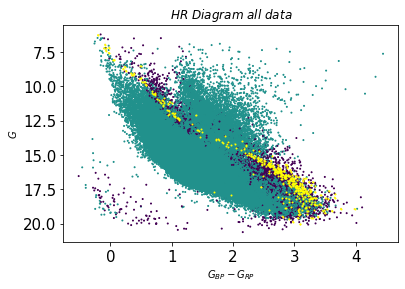

In [189]:
plt.scatter(ngcc['bp_rp'], ngcc['g'], s =1,c =ngcc['label'], cmap='viridis')
plt.scatter(ngcc_1['bp_rp'], ngcc_1['g'], s =1, color ='yellow')
plt.title('$HR$ $Diagram$ $all$ $data$')
plt.gca().invert_yaxis()
plt.ylabel('$G$')
plt.xlabel('$G_{BP}-G_{RP}$')
#plt.gca().invert_xaxis()

Text(0.5, 0, '$G_{BP}-G_{RP}$')

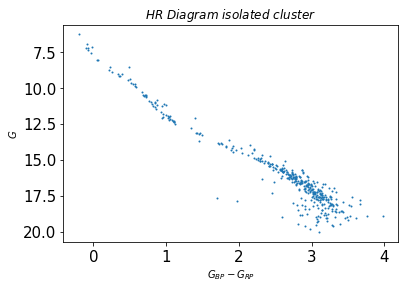

In [190]:
plt.scatter(ngcc_1['bp_rp'], ngcc_1['g'], s =1, cmap='viridis')
plt.title('$HR$ $Diagram$ $isolated$ $cluster$')
plt.gca().invert_yaxis()
plt.ylabel('$G$')
plt.xlabel('$G_{BP}-G_{RP}$')
#plt.gca().invert_xaxis()

In [382]:
len(ngcc_1['bp_rp'])

396

In [ ]:
beehive_p = pd.read_csv('/home/and/Data_science/Tesis/CSVs/filtered/Beehive_filtered.csv')

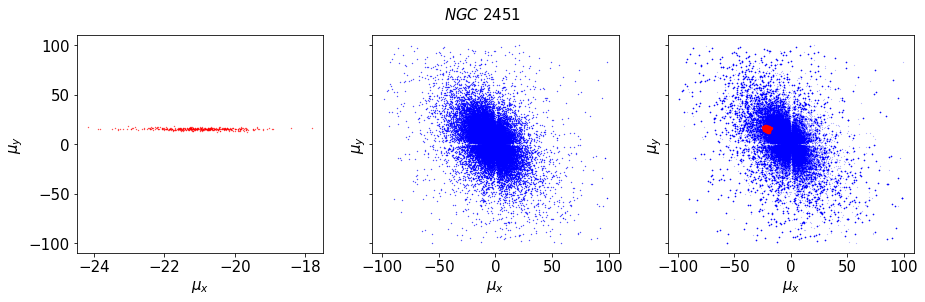

In [191]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharey=True,figsize=(15, 4))

ax0.scatter(ngcc_1['pmra'], ngcc_1['pmdec'], s =0.1, color ='red')
ax0.set_xlabel('$\mu_x$', fontsize = 15)
ax0.set_ylabel('$\mu_y$', fontsize = 15)


ax1.scatter(ngcc_0['pmra'], ngcc_0['pmdec'], s =0.1, color ='blue')
ax1.scatter(ngcc_1m['pmra'], ngcc_1m['pmdec'], s =0.1, color ='blue')
ax1.set_xlabel('$\mu_x$', fontsize = 15)
ax1.set_ylabel('$\mu_y$', fontsize = 15)

ax2.scatter(ngcc_1m['pmra'], ngcc_1m['pmdec'], s =0.4, color ='blue')
ax2.scatter(ngcc_0['pmra'], ngcc_0['pmdec'], s =0.01,  color ='blue')
ax2.scatter(ngcc_1['pmra'], ngcc_1['pmdec'], s =6, color= 'red')
ax2.set_xlabel('$\mu_x$', fontsize = 15)
ax2.set_ylabel('$\mu_y$', fontsize = 15)

fig.suptitle('$NGC$ $2451$', fontsize = 15)
plt.show()

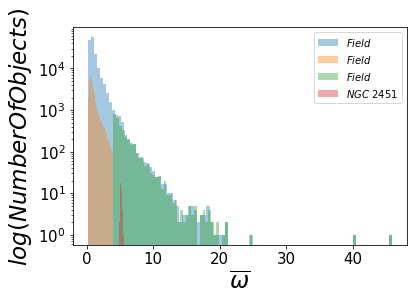

In [193]:
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.hist(ngcc['parallax'], bins =100 , alpha = 0.4, label = '$Field$')
plt.hist(ngcc_0['parallax'], bins =100 , alpha = 0.4, label = '$Field$')
plt.hist(ngcc_1m['parallax'], bins =100 , alpha = 0.4, label = '$Field$')
plt.hist(ngcc_1['parallax'], bins =100 , alpha = 0.4,  label = '$NGC$ $2451$')
#plt.title('$G_{RP}$ $Band$ $Intensity$', fontsize = 17)
plt.yscale('log')
plt.xlabel('$\overline{\omega}$', fontsize = 23)
plt.ylabel('$log(NumberOfObjects)$', fontsize = 23)
plt.legend()
plt.show()

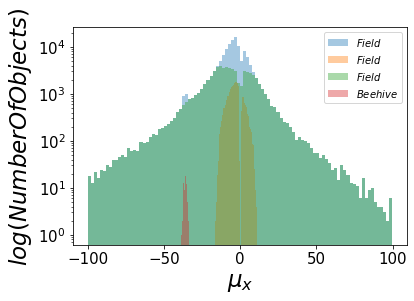

In [194]:
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.hist(bee['pmra'], bins =100 , alpha = 0.4, label = '$Field$')
plt.hist(bee_0['pmra'], bins =100 , alpha = 0.4, label = '$Field$')
plt.hist(bee_1m['pmra'], bins =100 , alpha = 0.4, label = '$Field$')
plt.hist(bee_1['pmra'], bins =100 , alpha = 0.4,  label = '$Beehive$')
#plt.title('$G_{RP}$ $Band$ $Intensity$', fontsize = 17)
plt.yscale('log')
plt.xlabel('$\mu_x$', fontsize = 23)
plt.ylabel('$log(NumberOfObjects)$', fontsize = 23)
plt.legend()
plt.show()

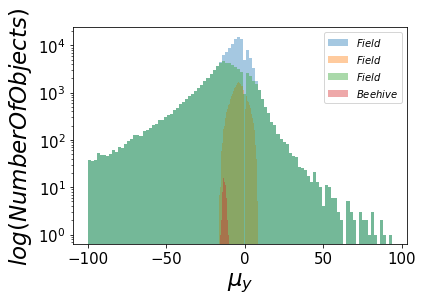

In [195]:
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.hist(bee['pmdec'], bins =100 , alpha = 0.4, label = '$Field$')
plt.hist(bee_0['pmdec'], bins =100 , alpha = 0.4, label = '$Field$')
plt.hist(bee_1m['pmdec'], bins =100 , alpha = 0.4, label = '$Field$')
plt.hist(bee_1['pmdec'], bins =100 , alpha = 0.4,  label = '$Beehive$')
#plt.title('$G_{RP}$ $Band$ $Intensity$', fontsize = 17)
plt.yscale('log')
plt.xlabel('$\mu_y$', fontsize = 23)
plt.ylabel('$log(NumberOfObjects)$', fontsize = 23)
plt.legend()
plt.show()

In [196]:
ngcc.to_csv(os.getcwd()+'/DBSCAN'+'/ngc2451_DBSCAN_with_parallax.csv', index=False, header= True)

In [ ]:
#fin parallax

In [549]:
ngc_dbscan = all_together(ngc, ngc_p, 1,10, 0.01, 36 )   

len(df_split_set):  10
len(dbscan):  10


In [550]:
ngc_dbscan_label = np.array(ngc_dbscan[0]['label'])
ngc_dbscan[1]['label'] = ngc_dbscan_label

In [551]:
ngcc = ngc_dbscan[1].copy()

In [552]:
ngcc.groupby(['label']).count()

Unnamed: 0    pmra  pmra_error   pmdec  pmdec_error  parallax  \
label                                                                  
-1          15939   15939       15939   15939        15939     15939   
 0         138618  138618      138618  138618       138618    138618   
 1            687     687         687     687          687       687   

       parallax_error       g  g_error      rp  rp_error      bp  bp_error  \
label                                                                        
-1              15939   15939    15939   15939     15939   15939     15939   
 0             138618  138618   138618  138618    138618  138618    138618   
 1                687     687      687     687       687     687       687   

        bp_rp  visibility_periods_used  astrometric_chi2_al  \
label                                                         
-1      15939                    15939                15939   
 0     138618                   138618               138618   
 1        687                      687                  687   

       astrometric_n_good_obs_al  abs(pmra_error/pmra)  \
label                                                    
-1                         15939                 15939   
 0                        138618                138618   
 1                           687                   687   

       abs(pmdec_error/pmdec)     UWE  
label                                  
-1                      15939   15939  
 0                     138618  138618  
 1                        687     687

In [553]:
ngcc.loc[ngcc['label']> 1, "label"] = -1

In [554]:
ngcc_0 =  ngcc.loc[ngcc['label'] == 0 ]
ngcc_1m=  ngcc.loc[ngcc['label'] == -1] 
ngcc_1 =  ngcc.loc[ngcc['label'] == 1]

In [555]:
ngcc.groupby(['label']).count()

Unnamed: 0    pmra  pmra_error   pmdec  pmdec_error  parallax  \
label                                                                  
-1          15939   15939       15939   15939        15939     15939   
 0         138618  138618      138618  138618       138618    138618   
 1            687     687         687     687          687       687   

       parallax_error       g  g_error      rp  rp_error      bp  bp_error  \
label                                                                        
-1              15939   15939    15939   15939     15939   15939     15939   
 0             138618  138618   138618  138618    138618  138618    138618   
 1                687     687      687     687       687     687       687   

        bp_rp  visibility_periods_used  astrometric_chi2_al  \
label                                                         
-1      15939                    15939                15939   
 0     138618                   138618               138618   
 1        687                      687                  687   

       astrometric_n_good_obs_al  abs(pmra_error/pmra)  \
label                                                    
-1                         15939                 15939   
 0                        138618                138618   
 1                           687                   687   

       abs(pmdec_error/pmdec)     UWE  
label                                  
-1                      15939   15939  
 0                     138618  138618  
 1                        687     687

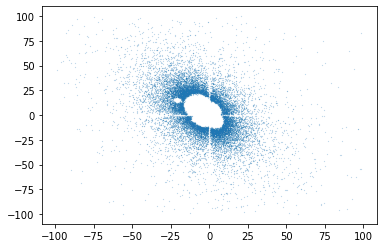

In [556]:
plt.scatter(ngcc_1m['pmra'], ngcc_1m['pmdec'], s =0.01)

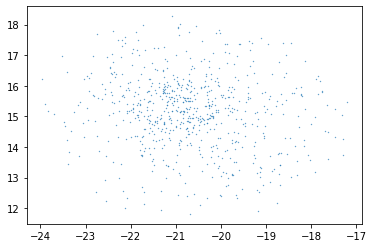

In [559]:
plt.scatter(ngcc_1['pmra'], ngcc_1['pmdec'], s =0.1)

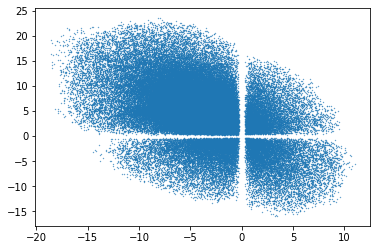

In [560]:
plt.scatter(ngcc_0['pmra'], ngcc_0['pmdec'], s =0.1)

Text(0.5, 0, '$\\mu_x$')

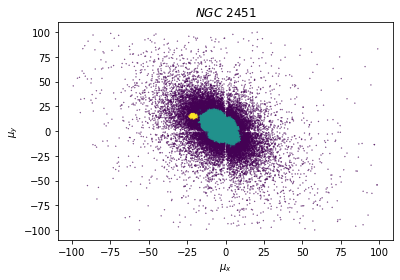

In [561]:
plt.scatter(ngcc['pmra'], ngcc['pmdec'], s =0.1,c =ngcc['label'], cmap='viridis')
plt.title('$NGC$ $2451$')
plt.ylabel('$\mu_y$')
plt.xlabel('$\mu_x$')
#plt.xlim(-50,50)
#plt.ylim(-50,50)

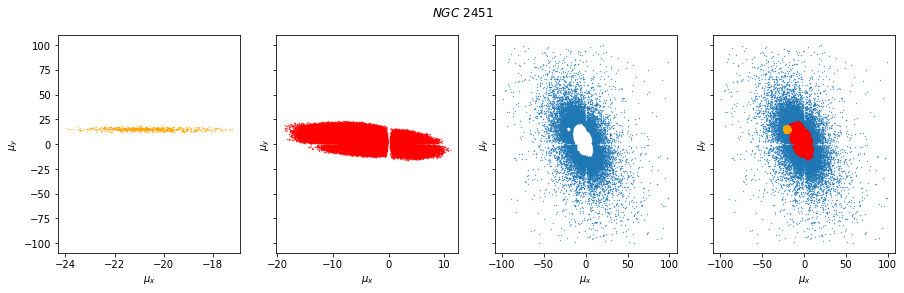

In [564]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=4, sharey=True,figsize=(15, 4))

ax0.scatter(ngcc_1['pmra'], ngcc_1['pmdec'], s =0.1, color ='orange')
ax0.set_xlabel('$\mu_x$')
ax0.set_ylabel('$\mu_y$')


ax1.scatter(ngcc_0['pmra'], ngcc_0['pmdec'], s =0.1, color ='red')
ax1.set_xlabel('$\mu_x$')
ax1.set_ylabel('$\mu_y$')

ax2.scatter(ngcc_1m['pmra'], ngcc_1m['pmdec'], s =0.1)
ax2.set_xlabel('$\mu_x$')
ax2.set_ylabel('$\mu_y$')

ax3.scatter(ngcc_1m['pmra'], ngcc_1m['pmdec'], s =0.1)
ax3.scatter(ngcc_0['pmra'], ngcc_0['pmdec'], s =0.01, color= 'red')
ax3.scatter(ngcc_1['pmra'], ngcc_1['pmdec'], s =3, color= 'orange')
ax3.set_xlabel('$\mu_x$')
ax3.set_ylabel('$\mu_y$')

fig.suptitle('$NGC$ $2451$')
plt.show()

Text(0.5, 0, '$G_{BP}-G_{RP}$')

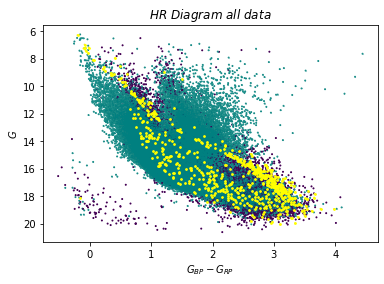

In [567]:
plt.scatter(ngcc['bp_rp'], ngcc['g'], s =1,c =ngcc['label'], cmap='viridis')
plt.scatter(ngcc_0['bp_rp'], ngcc_0['g'], s =0.01, color ='teal')
plt.scatter(ngcc_1['bp_rp'], ngcc_1['g'], s =3, color ='yellow')
plt.title('$HR$ $Diagram$ $all$ $data$')
plt.gca().invert_yaxis()
plt.ylabel('$G$')
plt.xlabel('$G_{BP}-G_{RP}$')
#plt.gca().invert_xaxis()

Text(0.5, 0, '$G_{BP}-G_{RP}$')

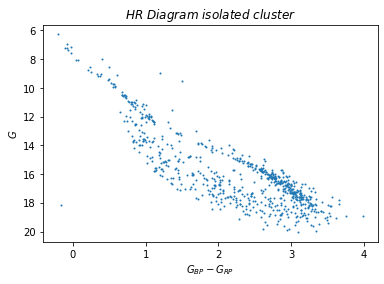

In [566]:
plt.scatter(ngcc_1['bp_rp'], ngcc_1['g'], s =1, cmap='viridis')
plt.title('$HR$ $Diagram$ $isolated$ $cluster$')
plt.gca().invert_yaxis()
plt.ylabel('$G$')
plt.xlabel('$G_{BP}-G_{RP}$')
#plt.gca().invert_xaxis()

In [568]:
ngcc.to_csv(os.getcwd()+'/DBSCAN'+'/ngc2451_DBSCAN.csv', index=False, header= True)

# Blanco 1

In [627]:
blanco_dbscan = all_together(blanco, blanco_p, 1,4, 0.001, 20 )   

len(df_split_set):  4
len(dbscan):  4


In [628]:
blanco_dbscan_label = np.array(blanco_dbscan[0]['label'])
blanco_dbscan[1]['label'] = blanco_dbscan_label

In [629]:
bla = blanco_dbscan[1].copy()

In [630]:
bla.groupby(['label']).count()

Unnamed: 0   pmra  pmra_error  pmdec  pmdec_error  parallax  \
label                                                                
-1          72955  72955       72955  72955        72955     72955   
 0             26     26          26     26           26        26   

       parallax_error      g  g_error     rp  rp_error     bp  bp_error  \
label                                                                     
-1              72955  72955    72955  72955     72955  72955     72955   
 0                 26     26       26     26        26     26        26   

       bp_rp  visibility_periods_used  astrometric_chi2_al  \
label                                                        
-1     72955                    72955                72955   
 0        26                       26                   26   

       astrometric_n_good_obs_al  abs(pmra_error/pmra)  \
label                                                    
-1                         72955                 72955   
 0                            26                    26   

       abs(pmdec_error/pmdec)    UWE  
label                                 
-1                      72955  72955  
 0                         26     26

In [612]:
bla.loc[bla['label']> 1, "label"] = -1

In [613]:
bla_0 =  bla.loc[bla['label'] == 0 ]
bla_1m=  bla.loc[bla['label'] == -1] 
bla_1 =  bla.loc[bla['label'] == 1]

In [614]:
bla.groupby(['label']).count()

Unnamed: 0   pmra  pmra_error  pmdec  pmdec_error  parallax  \
label                                                                
-1          72966  72966       72966  72966        72966     72966   
 0             15     15          15     15           15        15   

       parallax_error      g  g_error     rp  rp_error     bp  bp_error  \
label                                                                     
-1              72966  72966    72966  72966     72966  72966     72966   
 0                 15     15       15     15        15     15        15   

       bp_rp  visibility_periods_used  astrometric_chi2_al  \
label                                                        
-1     72966                    72966                72966   
 0        15                       15                   15   

       astrometric_n_good_obs_al  abs(pmra_error/pmra)  \
label                                                    
-1                         72966                 72966   
 0                            15                    15   

       abs(pmdec_error/pmdec)    UWE  
label                                 
-1                      72966  72966  
 0                         15     15

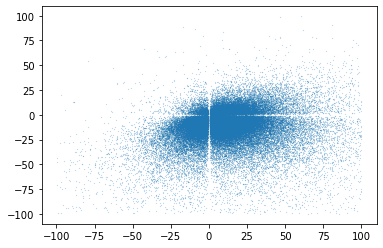

In [615]:
plt.scatter(bla_1m['pmra'], bla_1m['pmdec'], s =0.01)

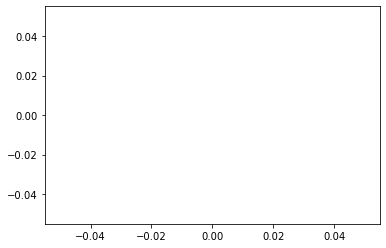

In [616]:
plt.scatter(bla_1['pmra'], bla_1['pmdec'], s =0.1)

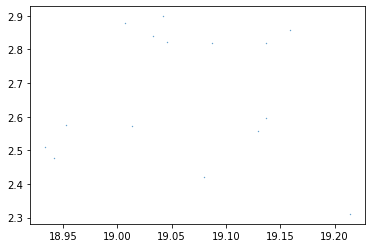

In [617]:
plt.scatter(bla_0['pmra'], bla_0['pmdec'], s =0.1)

Text(0.5, 0, '$\\mu_x$')

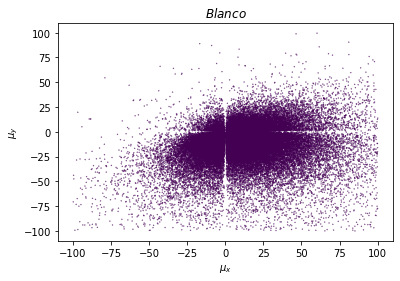

In [748]:
plt.scatter(bla['pmra'], bla['pmdec'], s =0.1,c =bla['label'], cmap='viridis')
plt.title('$Blanco$')
plt.ylabel('$\mu_y$')
plt.xlabel('$\mu_x$')
#plt.xlim(-50,50)
#plt.ylim(-50,50)

In [380]:
#with parallax

# Hyades 

In [686]:
hyades_dbscan = all_together(hyades, hyades_p, 1,35, 0.01, 50 )   

len(df_split_set):  35
len(dbscan):  35


In [730]:
hyades_dbscan = all_together(hyades, hyades_p, 1,35, 0.006, 60 )   

len(df_split_set):  35
len(dbscan):  35


In [731]:
hyades_dbscan_label = np.array(hyades_dbscan[0]['label'])
hyades_dbscan[1]['label'] = hyades_dbscan_label

In [743]:
hya = hyades_dbscan[1].copy()

In [744]:
hya.groupby(['label']).count()

Unnamed: 0    pmra  pmra_error   pmdec  pmdec_error  parallax  \
label                                                                  
-1         156375  156375      156375  156375       156375    156375   
 0         125054  125054      125054  125054       125054    125054   
 1          24198   24198       24198   24198        24198     24198   
 2           5844    5844        5844    5844         5844      5844   
 3           1229    1229        1229    1229         1229      1229   

       parallax_error       g  g_error      rp  rp_error      bp  bp_error  \
label                                                                        
-1             156375  156375   156375  156375    156375  156375    156375   
 0             125054  125054   125054  125054    125054  125054    125054   
 1              24198   24198    24198   24198     24198   24198     24198   
 2               5844    5844     5844    5844      5844    5844      5844   
 3               1229    1229     1229    1229      1229    1229      1229   

        bp_rp  visibility_periods_used  astrometric_chi2_al  \
label                                                         
-1     156375                   156375               156375   
 0     125054                   125054               125054   
 1      24198                    24198                24198   
 2       5844                     5844                 5844   
 3       1229                     1229                 1229   

       astrometric_n_good_obs_al  abs(pmra_error/pmra)  \
label                                                    
-1                        156375                156375   
 0                        125054                125054   
 1                         24198                 24198   
 2                          5844                  5844   
 3                          1229                  1229   

       abs(pmdec_error/pmdec)     UWE  
label                                  
-1                     156375  156375  
 0                     125054  125054  
 1                      24198   24198  
 2                       5844    5844  
 3                       1229    1229

In [745]:
#hya.loc[hya['label']> 1, "label"] = -1

In [746]:
hya_0 =  hya.loc[hya['label'] == 0 ]
hya_1m=  hya.loc[hya['label'] == -1] 
hya_1 =  hya.loc[hya['label'] >= 1]

In [747]:
hya.groupby(['label']).count()

Unnamed: 0    pmra  pmra_error   pmdec  pmdec_error  parallax  \
label                                                                  
-1         156375  156375      156375  156375       156375    156375   
 0         125054  125054      125054  125054       125054    125054   
 1          24198   24198       24198   24198        24198     24198   
 2           5844    5844        5844    5844         5844      5844   
 3           1229    1229        1229    1229         1229      1229   

       parallax_error       g  g_error      rp  rp_error      bp  bp_error  \
label                                                                        
-1             156375  156375   156375  156375    156375  156375    156375   
 0             125054  125054   125054  125054    125054  125054    125054   
 1              24198   24198    24198   24198     24198   24198     24198   
 2               5844    5844     5844    5844      5844    5844      5844   
 3               1229    1229     1229    1229      1229    1229      1229   

        bp_rp  visibility_periods_used  astrometric_chi2_al  \
label                                                         
-1     156375                   156375               156375   
 0     125054                   125054               125054   
 1      24198                    24198                24198   
 2       5844                     5844                 5844   
 3       1229                     1229                 1229   

       astrometric_n_good_obs_al  abs(pmra_error/pmra)  \
label                                                    
-1                        156375                156375   
 0                        125054                125054   
 1                         24198                 24198   
 2                          5844                  5844   
 3                          1229                  1229   

       abs(pmdec_error/pmdec)     UWE  
label                                  
-1                     156375  156375  
 0                     125054  125054  
 1                      24198   24198  
 2                       5844    5844  
 3                       1229    1229

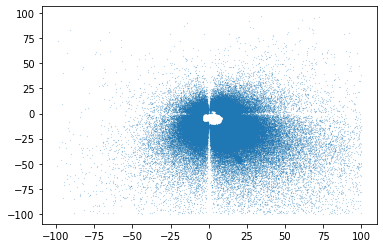

In [740]:
plt.scatter(hya_1m['pmra'], hya_1m['pmdec'], s =0.01)

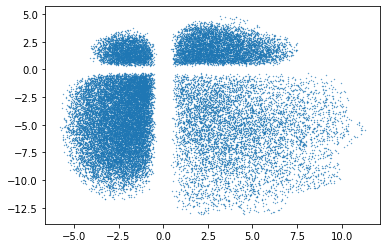

In [741]:
plt.scatter(hya_1['pmra'], hya_1['pmdec'], s =0.1)

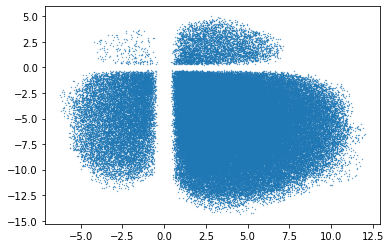

In [742]:
plt.scatter(hya_0['pmra'], hya_0['pmdec'], s =0.1)

Text(0.5, 0, '$\\mu_x$')

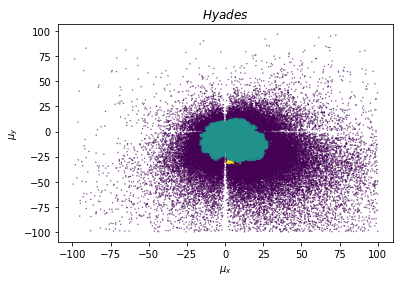

In [641]:
plt.scatter(hya['pmra'], hya['pmdec'], s =0.1,c =hya['label'], cmap='viridis')
plt.title('$Hyades$')
plt.ylabel('$\mu_y$')
plt.xlabel('$\mu_x$')
#plt.xlim(-50,50)
#plt.ylim(-50,50)

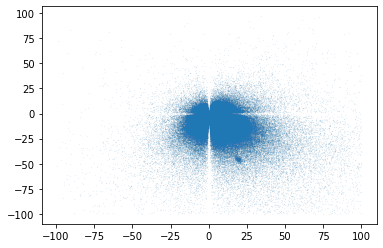

In [675]:
plt.scatter(hya['pmra'], hya['pmdec'], s =0.001)

In [197]:
#hyades parallax

In [318]:
hyades_dbscan = all_together(hyades, hyades_p, 1,12, 0.01, 7 )   

len(df_split_set):  12
len(dbscan):  12


In [319]:
hyades_dbscan_label = np.array(hyades_dbscan[0]['label'])
hyades_dbscan[1]['label'] = hyades_dbscan_label

In [320]:
hya = hyades_dbscan[1].copy()

In [321]:
hya.groupby(['label']).count()

Unnamed: 0    pmra  pmra_error   pmdec  pmdec_error  parallax  \
label                                                                  
-1          56849   56849       56849   56849        56849     56849   
 0         252221  252221      252221  252221       252221    252221   
 1            173     173         173     173          173       173   
 2            161     161         161     161          161       161   
 3            259     259         259     259          259       259   
 4            185     185         185     185          185       185   
 5            189     189         189     189          189       189   
 6            127     127         127     127          127       127   
 7            152     152         152     152          152       152   
 8            165     165         165     165          165       165   
 9            147     147         147     147          147       147   
 10           117     117         117     117          117       117   
 11           117     117         117     117          117       117   
 12           109     109         109     109          109       109   
 13            99      99          99      99           99        99   
 14           130     130         130     130          130       130   
 15           113     113         113     113          113       113   
 16           111     111         111     111          111       111   
 17           113     113         113     113          113       113   
 18           104     104         104     104          104       104   
 19            82      82          82      82           82        82   
 20            92      92          92      92           92        92   
 21           107     107         107     107          107       107   
 22            91      91          91      91           91        91   
 23            85      85          85      85           85        85   
 24            89      89          89      89           89        89   
 25            66      66          66      66           66        66   
 26            56      56          56      56           56        56   
 27            59      59          59      59           59        59   
 28            36      36          36      36           36        36   
 29            41      41          41      41           41        41   
 30            35      35          35      35           35        35   
 31            32      32          32      32           32        32   
 32            37      37          37      37           37        37   
 33            35      35          35      35           35        35   
 34            30      30          30      30           30        30   
 35            22      22          22      22           22        22   
 36            14      14          14      14           14        14   
 37            16      16          16      16           16        16   
 38            13      13          13      13           13        13   
 39             7       7           7       7            7         7   
 40             7       7           7       7            7         7   
 41             7       7           7       7            7         7   

       parallax_error       g  g_error      rp  rp_error      bp  bp_error  \
label                                                                        
-1              56849   56849    56849   56849     56849   56849     56849   
 0             252221  252221   252221  252221    252221  252221    252221   
 1                173     173      173     173       173     173       173   
 2                161     161      161     161       161     161       161   
 3                259     259      259     259       259     259       259   
 4                185     185      185     185       185     185       185   
 5                189     189      189     189       189     189       189   
 6                127     127      127     127       127     127

In [355]:
hya.loc[hya['parallax']< 6.75, "label"] = 0

In [356]:
hya_0 =  hya.loc[hya['label'] == 0 ]
hya_1m=  hya.loc[hya['label'] == -1] 
hya_1 =  hya.loc[hya['label'] >= 1]

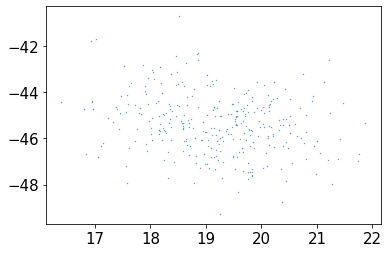

In [357]:
plt.scatter(hya_1['pmra'], hya_1['pmdec'], s = 0.1)

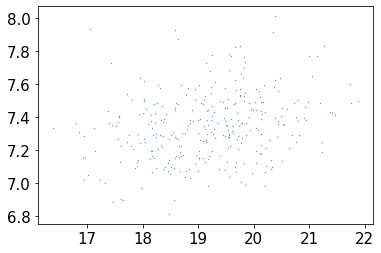

In [358]:
plt.scatter(hya_1['pmra'], hya_1['parallax'], s = 0.1)

In [359]:
hya.groupby(['label']).count()

Unnamed: 0    pmra  pmra_error   pmdec  pmdec_error  parallax  \
label                                                                  
-1           6899    6899        6899    6899         6899      6899   
 0         305487  305487      305487  305487       305487    305487   
 1             72      72          72      72           72        72   
 2             28      28          28      28           28        28   
 3             30      30          30      30           30        30   
 4             54      54          54      54           54        54   
 5             27      27          27      27           27        27   
 7             14      14          14      14           14        14   
 8             50      50          50      50           50        50   
 13            17      17          17      17           17        17   
 16            22      22          22      22           22        22   

       parallax_error       g  g_error      rp  rp_error      bp  bp_error  \
label                                                                        
-1               6899    6899     6899    6899      6899    6899      6899   
 0             305487  305487   305487  305487    305487  305487    305487   
 1                 72      72       72      72        72      72        72   
 2                 28      28       28      28        28      28        28   
 3                 30      30       30      30        30      30        30   
 4                 54      54       54      54        54      54        54   
 5                 27      27       27      27        27      27        27   
 7                 14      14       14      14        14      14        14   
 8                 50      50       50      50        50      50        50   
 13                17      17       17      17        17      17        17   
 16                22      22       22      22        22      22        22   

        bp_rp  visibility_periods_used  astrometric_chi2_al  \
label                                                         
-1       6899                     6899                 6899   
 0     305487                   305487               305487   
 1         72                       72                   72   
 2         28                       28                   28   
 3         30                       30                   30   
 4         54                       54                   54   
 5         27                       27                   27   
 7         14                       14                   14   
 8         50                       50                   50   
 13        17                       17                   17   
 16        22                       22                   22   

       astrometric_n_good_obs_al  abs(pmra_error/pmra)  \
label                                                    
-1                          6899                  6899   
 0                        305487                305487   
 1                            72                    72   
 2                            28                    28   
 3                            30                    30   
 4                            54                    54   
 5                            27                    27   
 7                            14                    14   
 8                            50                    50   
 13                           17                    17   
 16                           22                    22   

       abs(pmdec_error/pmdec)     UWE  
label                                  
-1                       6899    6899  
 0                     305487  305487  
 1                         72      72  
 2                         28      28  
 3                         30      30  
 4                         54      54  
 5                         27      27  
 7                         14      14  
 8                         50      50  
 13                        17      17  


In [360]:
hya_0 =  hya.loc[hya['label'] == 0 ]
hya_1m=  hya.loc[hya['label'] == -1] 
hya_1 =  hya.loc[hya['label'] >= 1]

Text(0.5, 0, '$G_{BP}-G_{RP}$')

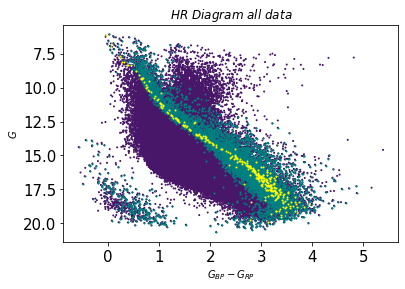

In [361]:
plt.scatter(hya['bp_rp'], hya['g'], s =1,c =hya['label'], cmap='viridis')
plt.scatter(hya_1m['bp_rp'], hya_1m['g'], s =1,c ='teal')
plt.scatter(hya_1['bp_rp'], hya_1['g'], s =1, color ='yellow')
plt.title('$HR$ $Diagram$ $all$ $data$')
plt.gca().invert_yaxis()
plt.ylabel('$G$')
plt.xlabel('$G_{BP}-G_{RP}$')
#plt.gca().invert_xaxis()

Text(0.5, 0, '$G_{BP}-G_{RP}$')

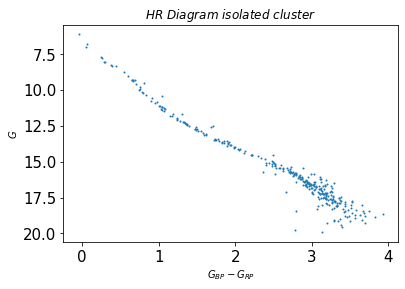

In [362]:
plt.scatter(hya_1['bp_rp'], hya_1['g'], s =1, cmap='viridis')
plt.title('$HR$ $Diagram$ $isolated$ $cluster$')
plt.gca().invert_yaxis()
plt.ylabel('$G$')
plt.xlabel('$G_{BP}-G_{RP}$')
#plt.gca().invert_xaxis()

In [381]:
len(hya_1['bp_rp'])

314

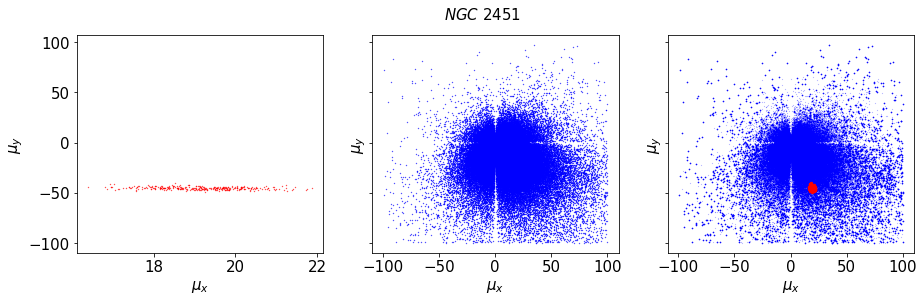

In [363]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharey=True,figsize=(15, 4))

ax0.scatter(hya_1['pmra'], hya_1['pmdec'], s =0.1, color ='red')
ax0.set_xlabel('$\mu_x$', fontsize = 15)
ax0.set_ylabel('$\mu_y$', fontsize = 15)


ax1.scatter(hya_0['pmra'], hya_0['pmdec'], s =0.1, color ='blue')
ax1.scatter(hya_1m['pmra'], hya_1m['pmdec'], s =0.1, color ='blue')
ax1.set_xlabel('$\mu_x$', fontsize = 15)
ax1.set_ylabel('$\mu_y$', fontsize = 15)

ax2.scatter(hya_1m['pmra'], hya_1m['pmdec'], s =0.4, color ='blue')
ax2.scatter(hya_0['pmra'], hya_0['pmdec'], s =0.01,  color ='blue')
ax2.scatter(hya_1['pmra'], hya_1['pmdec'], s =6, color= 'red')
ax2.set_xlabel('$\mu_x$', fontsize = 15)
ax2.set_ylabel('$\mu_y$', fontsize = 15)

fig.suptitle('$NGC$ $2451$', fontsize = 15)
plt.show()

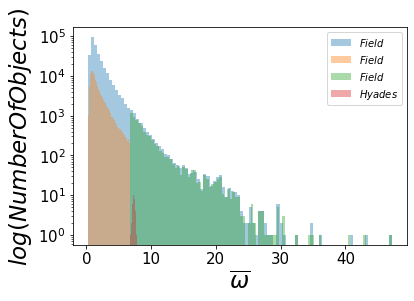

In [364]:
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.hist(hya['parallax'], bins =100 , alpha = 0.4, label = '$Field$')
plt.hist(hya_0['parallax'], bins =100 , alpha = 0.4, label = '$Field$')
plt.hist(hya_1m['parallax'], bins =100 , alpha = 0.4, label = '$Field$')
plt.hist(hya_1['parallax'], bins =100 , alpha = 0.4,  label = '$Hyades$')
#plt.title('$G_{RP}$ $Band$ $Intensity$', fontsize = 17)
plt.yscale('log')
plt.xlabel('$\overline{\omega}$', fontsize = 23)
plt.ylabel('$log(NumberOfObjects)$', fontsize = 23)
plt.legend()
plt.show()

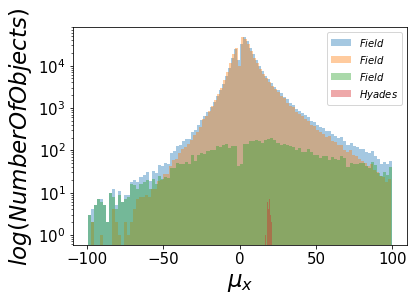

In [365]:
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.hist(hya['pmra'], bins =100 , alpha = 0.4, label = '$Field$')
plt.hist(hya_0['pmra'], bins =100 , alpha = 0.4, label = '$Field$')
plt.hist(hya_1m['pmra'], bins =100 , alpha = 0.4, label = '$Field$')
plt.hist(hya_1['pmra'], bins =100 , alpha = 0.4,  label = '$Hyades$')
#plt.title('$G_{RP}$ $Band$ $Intensity$', fontsize = 17)
plt.yscale('log')
plt.xlabel('$\mu_x$', fontsize = 23)
plt.ylabel('$log(NumberOfObjects)$', fontsize = 23)
plt.legend()
plt.show()

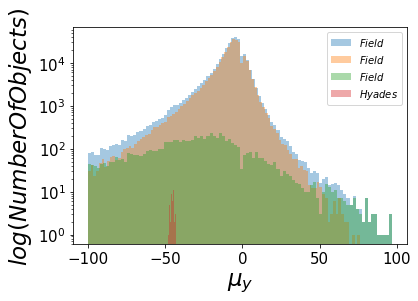

In [366]:
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.hist(hya['pmdec'], bins =100 , alpha = 0.4, label = '$Field$')
plt.hist(hya_0['pmdec'], bins =100 , alpha = 0.4, label = '$Field$')
plt.hist(hya_1m['pmdec'], bins =100 , alpha = 0.4, label = '$Field$')
plt.hist(hya_1['pmdec'], bins =100 , alpha = 0.4,  label = '$Hyades$')
#plt.title('$G_{RP}$ $Band$ $Intensity$', fontsize = 17)
plt.yscale('log')
plt.xlabel('$\mu_y$', fontsize = 23)
plt.ylabel('$log(NumberOfObjects)$', fontsize = 23)
plt.legend()
plt.show()

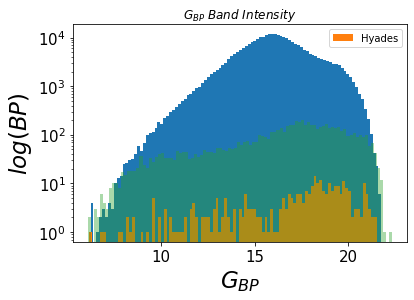

In [371]:
plt.hist(hya_0['bp'], bins =100)
plt.hist(hya_1['bp'],bins =100, label ="Hyades")
plt.hist(hya_1m['bp'],bins =100, alpha =0.4)
plt.title('$G_{BP}$ $Band$ $Intensity$')
plt.yscale('log')
plt.xlabel('$G_{BP}$', fontsize = 23)
plt.ylabel('$log(BP)$', fontsize = 23)
plt.legend()
plt.show()

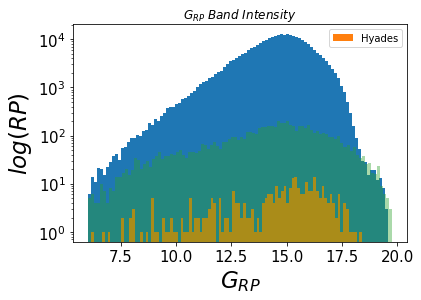

In [370]:
plt.hist(hya_0['rp'], bins =100)
plt.hist(hya_1['rp'],bins =100, label ="Hyades")
plt.hist(hya_1m['rp'],bins =100, alpha =0.4)
plt.title('$G_{RP}$ $Band$ $Intensity$')
plt.yscale('log')
plt.xlabel('$G_{RP}$', fontsize = 23)
plt.ylabel('$log(RP)$', fontsize = 23)
plt.legend()
plt.show()

In [378]:
hya.to_csv(os.getcwd()+'/DBSCAN'+'/hyades_DBSCAN_with_parallax.csv', index=False, header= True)